## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u> 

## **Setup**

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# First mount your drive before running these cells. 
# Create a folder for the this HW and change to that dir
%cd drive/My\ Drive/CSE519/HW2
%pwd

/content/drive/My Drive/CSE519/HW2


'/content/drive/My Drive/CSE519/HW2'

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
# Create a new API token under "Account" in the kaggle webpage and download the json file
# Upload the file by clicking on the browse 
files.upload()

In [ ]:
!kaggle competitions download -c microsoft-malware-prediction

## **Section 1: Library and Data Imports (Q1)**

- Import your libraries and read the data into a dataframe. Print the head of the dataframe. 

In [3]:
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import sys

In [4]:
use_cols = ["MachineIdentifier", "SmartScreen", "AVProductsInstalled", "AppVersion", "CountryIdentifier", "Census_OSInstallTypeName", "Wdft_IsGamer",
           "EngineVersion", "AVProductStatesIdentifier", "Census_OSVersion", "Census_TotalPhysicalRAM", "Census_ActivationChannel",
           "RtpStateBitfield", "Census_ProcessorModelIdentifier", "Census_PrimaryDiskTotalCapacity", 
            "Census_InternalPrimaryDiagonalDisplaySizeInInches", "Wdft_RegionIdentifier", "LocaleEnglishNameIdentifier",
           "AvSigVersion", "IeVerIdentifier", "IsProtected", "Census_InternalPrimaryDisplayResolutionVertical", "Census_PrimaryDiskTypeName",
            "Census_OSWUAutoUpdateOptionsName", "Census_OSEdition", "Census_GenuineStateName", "Census_ProcessorCoreCount", 
           "Census_OEMNameIdentifier", "Census_MDC2FormFactor", "Census_FirmwareManufacturerIdentifier", "OsBuildLab", "Census_OSBuildRevision", 
            "Census_OSBuildNumber", "Census_IsPenCapable", "Census_IsTouchEnabled", "Census_IsAlwaysOnAlwaysConnectedCapable", "Census_IsSecureBootEnabled", 
            "Census_SystemVolumeTotalCapacity", "Census_PrimaryDiskTotalCapacity", "HasDetections"
           ]
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16'        
        }

In [5]:
'''
Getting the data in a variable.
The notebook crashes if we let the read_csv do all the conversion and so using
use_cols and dtypes to make read_csv reading easier.
'''
trainData = pd.read_csv('train.csv.zip', usecols=use_cols, dtype=dtypes)
print(trainData.shape)

(8921483, 39)


In [6]:
trainData.head()

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,LocaleEnglishNameIdentifier,OsBuildLab,IsProtected,IeVerIdentifier,SmartScreen,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_ProcessorCoreCount,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionVertical,Census_OSVersion,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FirmwareManufacturerIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,7.0,53447.0,1.0,29,-85,17134.1.amd64fre.rs4_release.180410-1804,1.0,137.0,NaN,Desktop,2668.0,4.0,2340.0,476940.0,HDD,299451.0,4096.0,18.906250,900.0,10.0.17134.165,17134,165,Professional,UUPUpgrade,UNKNOWN,IS_GENUINE,Retail,628.0,0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,7.0,53447.0,1.0,93,64,17134.1.amd64fre.rs4_release.180410-1804,1.0,137.0,NaN,Notebook,2668.0,4.0,2404.0,476940.0,HDD,102385.0,4096.0,13.898438,768.0,10.0.17134.1,17134,1,Professional,IBSClean,UNKNOWN,OFFLINE,Retail,628.0,0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,7.0,53447.0,1.0,86,49,17134.1.amd64fre.rs4_release.180410-1804,1.0,137.0,RequireAdmin,Desktop,4908.0,4.0,1972.0,114473.0,SSD,113907.0,4096.0,21.500000,1080.0,10.0.17134.165,17134,165,Core,UUPUpgrade,FullAuto,IS_GENUINE,OEM:NONSLP,142.0,0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,7.0,53447.0,1.0,88,115,17134.1.amd64fre.rs4_release.180410-1804,1.0,137.0,ExistsNotSet,Desktop,1443.0,4.0,2272.0,238475.0,UNKNOWN,227116.0,4096.0,18.500000,768.0,10.0.17134.228,17134,228,Professional,UUPUpgrade,FullAuto,IS_GENUINE,OEM:NONSLP,355.0,0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,1.1.15100.1,4.18.1807.18075,1.273.1379.0,7.0,53447.0,1.0,18,75,17134.1.amd64fre.rs4_release.180410-1804,1.0,137.0,RequireAdmin,Notebook,1443.0,4.0,2500.0,476940.0,HDD,101900.0,6144.0,14.000000,768.0,10.0.17134.191,17134,191,Core,Update,FullAuto,IS_GENUINE,Retail,355.0,0,0,0,0.0,0.0,1.0,1


## **Section 2: Measure of Power (Q2a & 2b)**

In [7]:
q2Data = trainData[['Census_ProcessorCoreCount', 'Census_TotalPhysicalRAM', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'HasDetections']]

In [8]:
q2Data.fillna(q2Data.median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [9]:
scaler_ = preprocessing.MinMaxScaler()
q2DataScaled = scaler_.fit_transform(q2Data)
q2DataScaled = pd.DataFrame(q2DataScaled, columns=q2Data.columns)

<font color='cyan'>My formula for Machine Power includes 3 fields with following weightage:
1. `Census_TotalPhysicalRAM` : `0.5`
2. `Census_ProcessorCoreCount` : `0.3`
3. `Census_PrimaryDiskTotalCapacity` : `0.2`

In [10]:
machinePower = 0.5*q2DataScaled['Census_TotalPhysicalRAM'] + 0.3*q2DataScaled['Census_ProcessorCoreCount'] + 0.2*q2DataScaled['Census_PrimaryDiskTotalCapacity']
machinePower = machinePower.reindex_like(q2DataScaled)

Text(0, 0.007235578736177351, '0.00724')

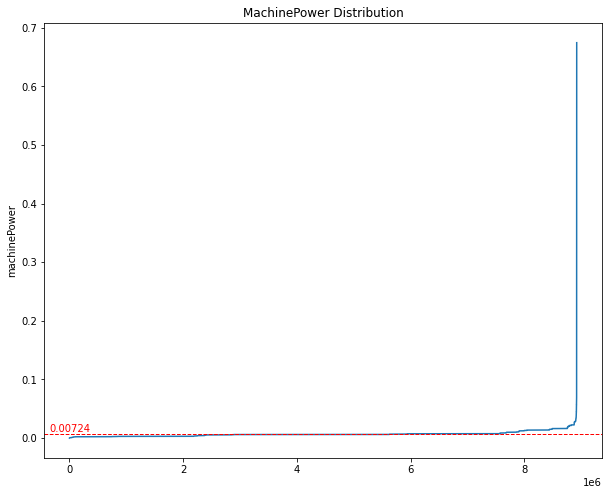

In [11]:
ax = machinePower.sort_values(ignore_index=True).plot(ylabel='machinePower', figsize=(10,8), title='MachinePower Distribution')
ax.axhline(y=machinePower.quantile(0.8), color="red", linestyle='--', linewidth=1)
ax.text(0,machinePower.quantile(0.8), "{:.5f}".format(machinePower.quantile(0.8)), color="red", #transform=trans, 
        ha="center", va="bottom")

<font color='cyan'> It is clear from above plot that most of the Machine Power distribution lie between `0-0.07`. So I did some analysis, found 20,40,60,80 quantile and came with certain thresholds to categorize my data.

In [12]:
print(q2Data[(machinePower < 0.00279)].shape)
print(q2Data[(machinePower >= 0.00279) & (machinePower < 0.0059)].shape)
print(q2Data[(machinePower >= 0.0055) & (machinePower < 0.02)].shape)
print(q2Data[(machinePower >= 0.02) & (machinePower < 0.03)].shape)
print(q2Data[(machinePower >= 0.03)].shape)

(854318, 5)
(2039690, 5)
(5936104, 5)
(114539, 5)
(17472, 5)


In [ ]:
q2Data[(machinePower < 0.001)].head(5)

,Census_ProcessorCoreCount,Census_TotalPhysicalRAM,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,HasDetections
111,1.0,1023.0,51200.0,50649.0,0
328,1.0,2047.0,10680.0,10129.0,0
495,1.0,2048.0,114473.0,37167.0,0
551,1.0,3071.0,51200.0,50218.0,0
566,1.0,2048.0,381554.0,381002.0,1


In [ ]:
q2Data[(machinePower >= 0.001) & (machinePower < 0.0055)].head(5)

,Census_ProcessorCoreCount,Census_TotalPhysicalRAM,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,HasDetections
5,2.0,8192.0,114473.0,113671.0,1
6,2.0,4096.0,476940.0,458702.0,1
7,2.0,4096.0,305245.0,290807.0,0
11,2.0,4096.0,122104.0,120827.0,1
13,2.0,8192.0,953869.0,953034.0,0


In [ ]:
q2Data[(machinePower >= 0.0055) & (machinePower < 0.02)].head(5)

,Census_ProcessorCoreCount,Census_TotalPhysicalRAM,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,HasDetections
0,4.0,4096.0,476940.0,299451.0,0
1,4.0,4096.0,476940.0,102385.0,0
2,4.0,4096.0,114473.0,113907.0,0
3,4.0,4096.0,238475.0,227116.0,1
4,4.0,6144.0,476940.0,101900.0,1


In [ ]:
q2Data[(machinePower >= 0.02) & (machinePower < 0.03)].head(5)


,Census_ProcessorCoreCount,Census_TotalPhysicalRAM,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,HasDetections
87,12.0,16384.0,488386.0,473415.0,1
207,12.0,16384.0,238475.0,237894.0,1
216,8.0,32768.0,715404.0,285317.0,1
242,12.0,16384.0,228944.0,228263.0,1
265,8.0,32768.0,953869.0,952621.0,0


In [ ]:
q2Data[(machinePower >= 0.03)].head(5)

,Census_ProcessorCoreCount,Census_TotalPhysicalRAM,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,HasDetections
1099,12.0,65536.0,114473.0,113917.0,1
1588,16.0,32768.0,906134.0,454787.0,1
2707,20.0,16384.0,244198.0,99385.0,1
3592,20.0,32768.0,238475.0,237087.0,0
3768,20.0,4096.0,113920.0,113352.0,0


<font color='cyan'>Considering the above analysis, I have come up with the below transformation function to convert the numerical value of machine power to human convenient categorical format.</font>

In [13]:
def transform_func(df_):
  if df_ < 0.001 : return "VERY LOW"
  elif df_ >= 0.001 and df_ < 0.0055: return "LOW"
  elif df_ >= 0.0055 and df_ < 0.02: return "MEDIUM"
  elif df_ >= 0.02 and df_ < 0.03: return "HIGH"
  elif df_ >= 0.03: return "VERY HIGH"

cat_machine_power = pd.api.types.CategoricalDtype(['VERY LOW', 'LOW', 'MEDIUM', 'HIGH', 'VERY HIGH'], ordered=True)

In [14]:
q2Data['machinePowerLabel'] = machinePower.apply(transform_func)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
q2Data['machinePowerLabel'] = q2Data['machinePowerLabel'].astype(cat_machine_power)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


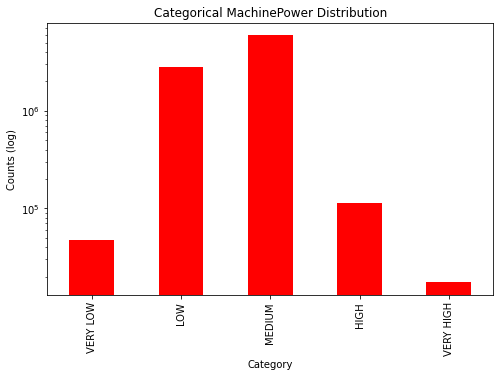

In [16]:
# q2Data['machinePowerLabel'].value_counts(sort=False).plot(logy=True)
q2Data['machinePowerLabel'].value_counts(sort=False).plot(kind='bar', color='red', logy=True, 
                                                          title='Categorical MachinePower Distribution', figsize=(8,5),
                                                          ylabel='Counts (log)', xlabel='Category')

<font color='cyan'>The powerful computers are more likely to have malware than underpowered machines according to the definition of Machine Power demonstrated above.<br> The evidence (plots for power vs detection) is plotted in following cell. </font>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c62fc6a50>,
      dtype=object)

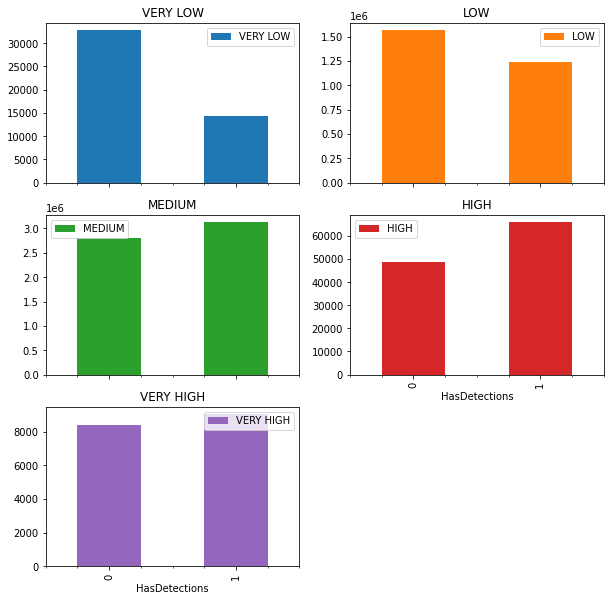

In [ ]:
# q2Data.hist(column='HasDetections', by='machinePowerLabel', figsize=(10,10), bins=2)
q2DataPlot = q2Data.groupby('machinePowerLabel')['HasDetections'].value_counts()
q2DataPlot.name = "TotalCount"
q2DataPlot = q2DataPlot.reset_index('HasDetections').pivot(columns='HasDetections', values='TotalCount').fillna(0)
# q2DataPlot.plot.bar(stacked=True)
q2DataPlot.T.plot(kind='bar', subplots=True, figsize=(10,10), layout=(-1, 2))

## **Section 3: OS version vs Malware detected (Q3)**

####<font color='cyan'> OSBuildNumber
There are almost 100+ unique `OSBuildNumber` and it is hard to visualize all of them together. So I plotted top 100 (count-wise and percentage-wise) OSBuildNumber that were infected with Malware.
<br>
The obeservation was that while looking at the plot for number of infected machine in each `OSBuildNumber` we find different set of OSBuildNumber than that found in percentage plot. This means, looking at number-plot is not useful as it doesn't really represent if the Version is malicious. However, the true insight is provided by the percentage-plot where many of the OSBuildNumber have `100%` Malware Detection.
</font>

In [17]:
q3Data_a = trainData.groupby('Census_OSBuildNumber')['HasDetections'].value_counts()
q3Data_a.name = "TotalCount"
q3Data_a = q3Data_a.reset_index('HasDetections').pivot(columns='HasDetections', values='TotalCount').fillna(0)

In [18]:
q3Data_a['PercentageDetection'] = q3Data_a[1]/(q3Data_a[0]+q3Data_a[1])
q3Data_a

HasDetections,0,1,PercentageDetection
Census_OSBuildNumber,,,
7600,1.0,0.0,0.000000
7601,3.0,4.0,0.571429
9200,3.0,3.0,0.500000
9600,9.0,3.0,0.250000
10240,139501.0,132103.0,0.486381
...,...,...,...
18238,1.0,0.0,0.000000
18240,5.0,0.0,0.000000
18241,1.0,0.0,0.000000


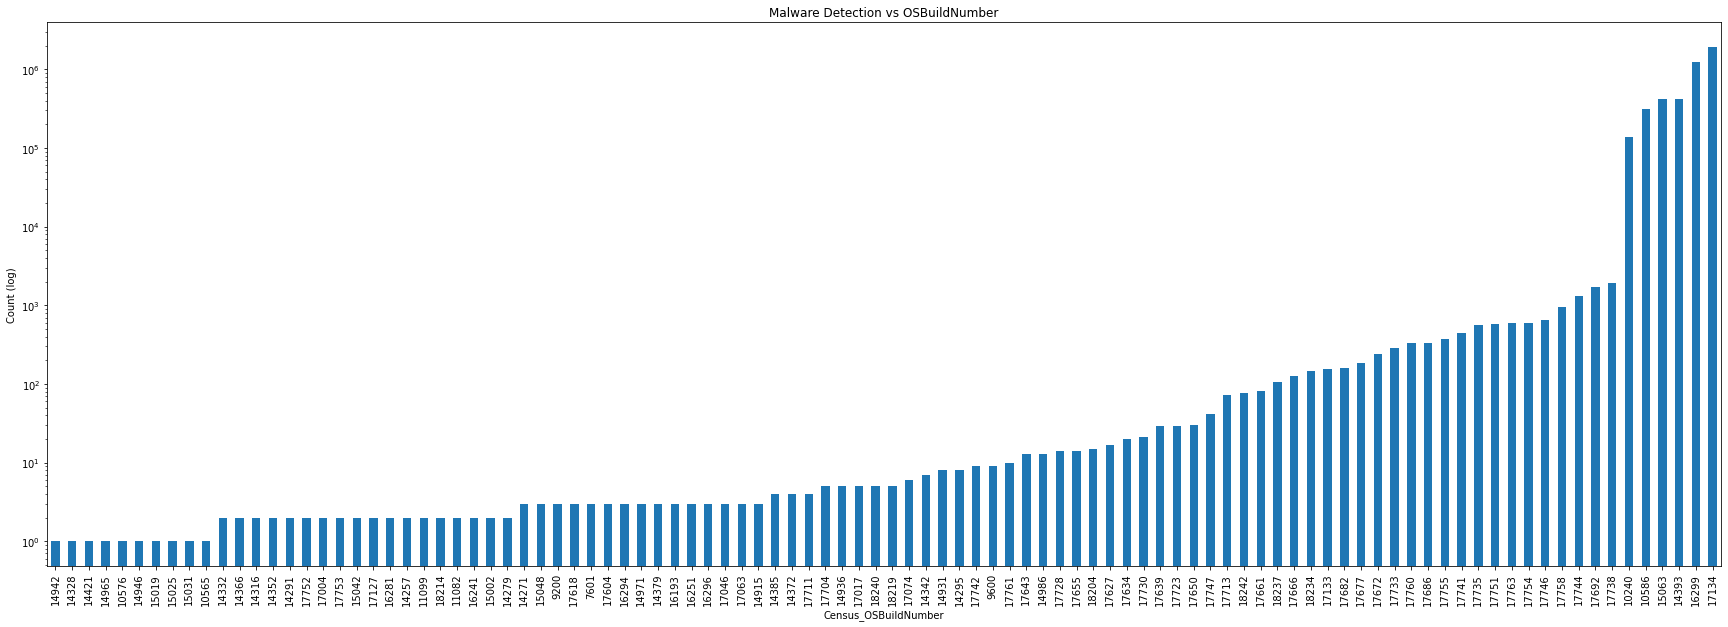

In [27]:
q3Data_a[0].sort_values()[-100:].plot(kind='bar', figsize=(30,10), logy=True, ylabel='Count (log)', title='Malware Detection vs OSBuildNumber')

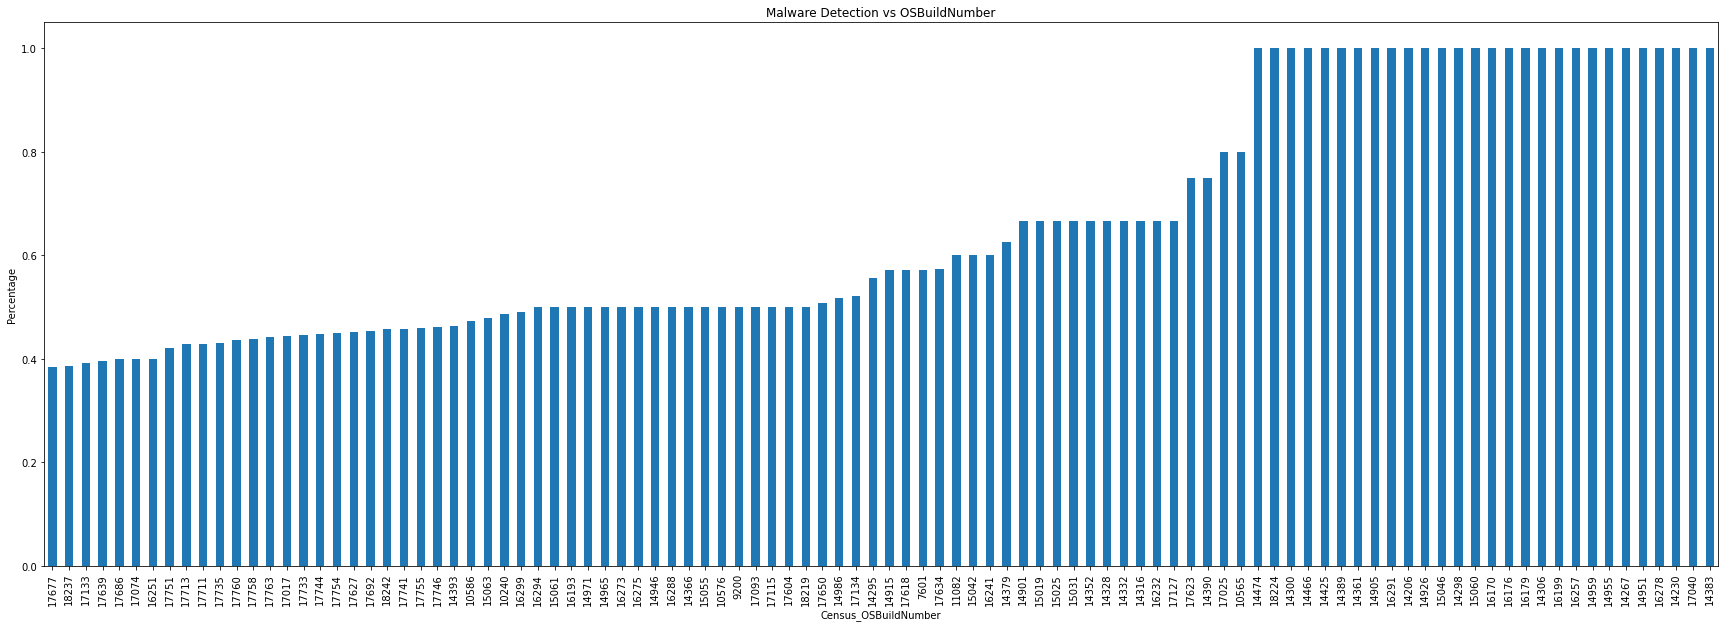

In [20]:
q3Data_a['PercentageDetection'].sort_values()[-100:].plot(kind='bar', figsize=(30,10), ylabel='Percentage', title='Malware Detection vs OSBuildNumber')

####<font color='cyan'> OSBuildRevision
There are almost 100+ unique `OSBuildRevision` and it is hard to visualize all of them together. So I plotted top 100 (count-wise and percentage-wise) OSBuildRevision that were infected with Malware.
<br>
The obeservation was that while looking at the plot for number of infected machine in each `OSBuildRevision` we find different set of OSBuildRevision than that found in percentage plot. This means, looking at number-plot is not useful as it doesn't really represent if the Version is malicious. However, the true insight is provided by the percentage-plot where many of the OSBuildRevision have `100%` Malware Detection.
</font>

In [21]:
q3Data_b = trainData.groupby('Census_OSBuildRevision')['HasDetections'].value_counts()
q3Data_b.name = "TotalCount"
q3Data_b = q3Data_b.reset_index('HasDetections').pivot(columns='HasDetections', values='TotalCount').fillna(0)

In [22]:
q3Data_b['PercentageDetection'] = q3Data_b[1]/(q3Data_b[0]+q3Data_b[1])
q3Data_b

HasDetections,0,1,PercentageDetection
Census_OSBuildRevision,,,
0,80719.0,85650.0,0.514819
1,51280.0,55303.0,0.518873
3,3153.0,3588.0,0.532265
4,283.0,239.0,0.457854
5,4455.0,3125.0,0.412269
...,...,...,...
23418,1.0,0.0,0.000000
24149,1.0,0.0,0.000000
24214,0.0,1.0,1.000000


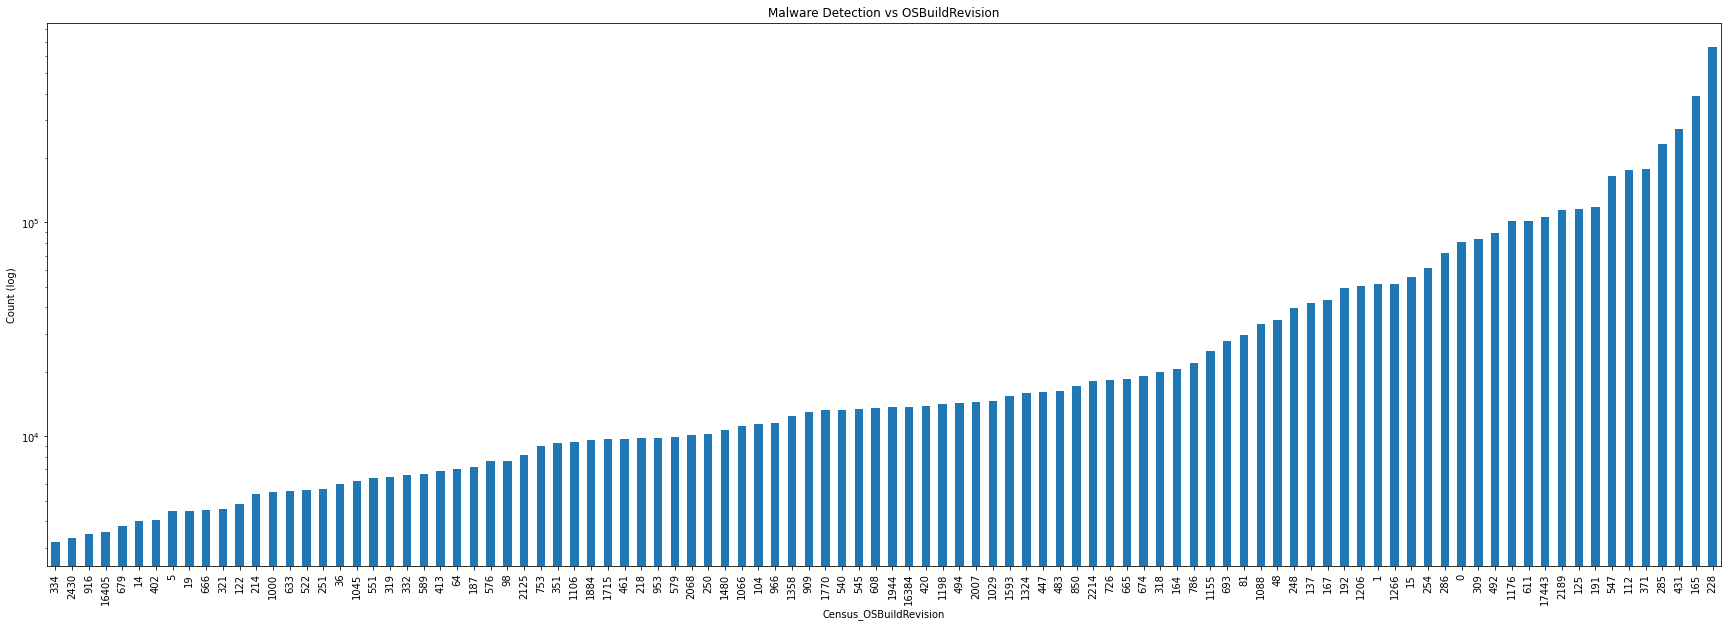

In [26]:
q3Data_b[0].sort_values()[-100:].plot(kind='bar', figsize=(30,10), logy=True, ylabel='Count (log)', title='Malware Detection vs OSBuildRevision')

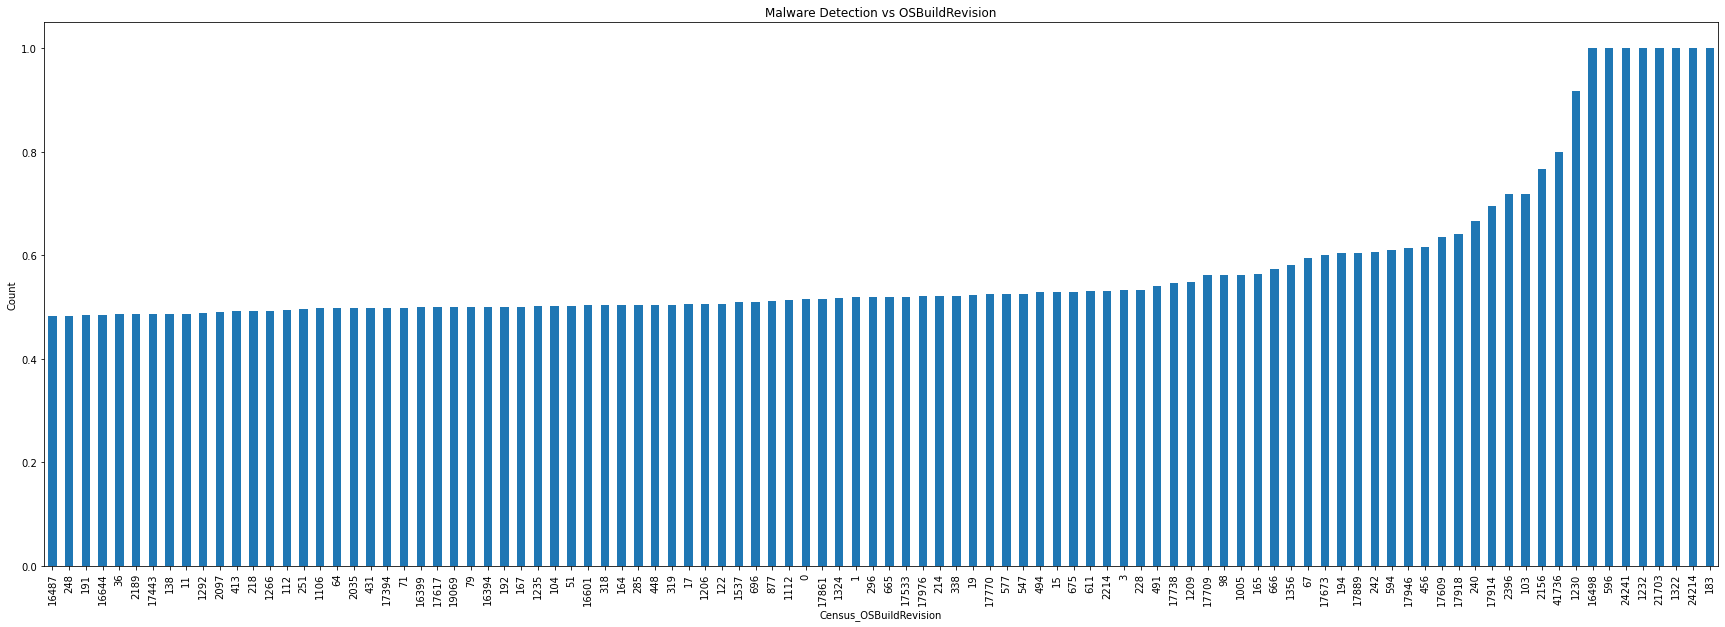

In [25]:
q3Data_b['PercentageDetection'].sort_values()[-100:].plot(kind='bar', figsize=(30,10), ylabel='Count', title='Malware Detection vs OSBuildRevision')

## **Section 3: Effect of Number of AV Products Installed (Q4)**

<font color='cyan'>To show the effect of Number of AV products we group the data on `AVProductsInstalled` column and count Detections vs Not Detections for each group as follows:
</font>

In [ ]:
q4Data = trainData[['AVProductsInstalled','HasDetections']]
q4Data = q4Data.fillna(0)
q4Data.groupby('AVProductsInstalled')['HasDetections'].value_counts()

AVProductsInstalled  HasDetections
0.0                  0                  22589
                     1                  13633
1.0                  1                3406078
                     0                2802815
2.0                  0                1483012
                     1                 975996
3.0                  0                 147421
                     1                  60682
4.0                  0                   6386
                     1                   2371
5.0                  0                    346
                     1                    125
6.0                  0                     22
                     1                      6
7.0                  1                      1
Name: HasDetections, dtype: int64

<font color='cyan'>The above table is not quite informative so I plot the above table in bar chart format below.
<br>
It is noted that when the number of `AVProductsInstalled` increased in number from 1 to 6 the percentage of Malware Detection went on decreasing. The graph of `AVProductsInstalled=0 & AVProductsInstalled=7` is not quite informative here because `0` has all the data points that had missing value and `7` just has a single data point. So they are ignored will deduction of conclusion.
</font>

In [ ]:
q4Data = q4Data.groupby('AVProductsInstalled')['HasDetections'].value_counts()
q4Data.name = "TotalCount"
q4Data = q4Data.reset_index('HasDetections').pivot(columns='HasDetections', values='TotalCount').fillna(0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5f18d3d50>,
      dtype=object)

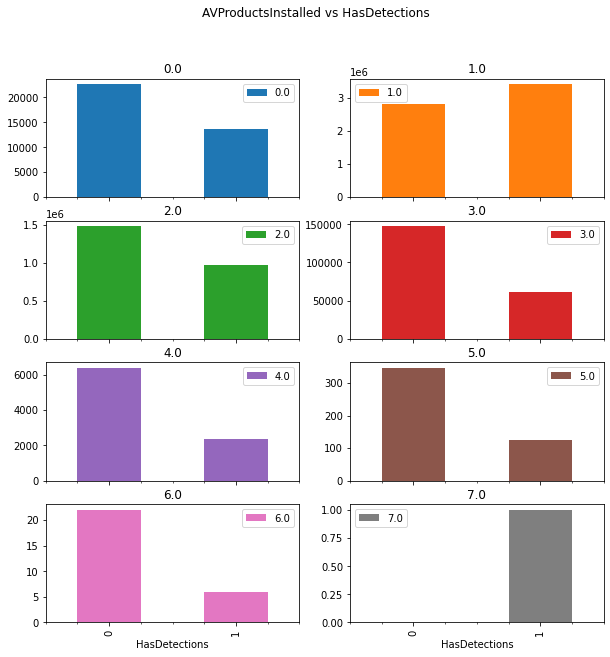

In [ ]:
q4Data.T.plot(kind='bar', subplots=True, figsize=(10,10), layout=(-1, 2), title='AVProductsInstalled vs HasDetections')


## **Section 4: Interesting findings (Q5)**

#### <font color='cyan'>Plot 1
The `AVProductsInstalled` showed how many Anti-virus products version installed. However, are all the proucts enabled in all cases? <br>
To show this I plotted a heatmap for `AVProductsInstalled` vs `AVProductsEnabled`. I normalized the count of each mapping to bring all values in same range (0,1) to compare.
<br>
The heatmap suggested that machine didn't enable the actual number of installed AVProducts. In fact, they mostly used `1` AVProduct despite the number of installed. 
</font>

In [ ]:
q5a = pd.read_csv('train.csv.zip', usecols=['AVProductsInstalled', 'AVProductsEnabled'], dtype=dtypes)
q5a = q5a.fillna(0)

In [ ]:
q5a = q5a.groupby(['AVProductsInstalled','AVProductsEnabled']).size().reset_index().rename(columns={0:'Counts'})
q5a = q5a.pivot(index='AVProductsInstalled',columns='AVProductsEnabled',values='Counts')

In [ ]:
q5a_normalized = preprocessing.normalize(q5a.fillna(0))
q5a_normalized = pd.DataFrame(q5a_normalized, index=q5a.index, columns=q5a.columns)
q5a_normalized

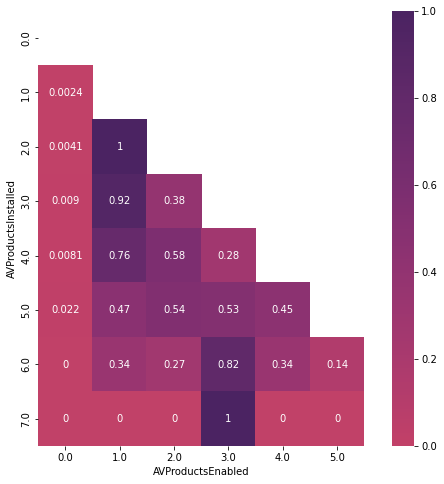

In [ ]:
mask = np.triu(np.ones_like(q5a_normalized, dtype=bool))
cmap = sns.color_palette('flare', as_cmap=True)
plt.subplots(figsize=(10,8))
sns.heatmap(q5a_normalized, mask=mask, cmap=cmap, center=0,
            square=True, annot=True)


####<font color='cyan'>Plot 2
 `Census_MDC2FormFactor` is an interesting feature to observe while detecting malware. While looking at the data of detected malware machine it looks like most of the machine had a particular type `Notebook` as their categorical feature `Census_MDC2FormFactor`. Hence it seems a great feature.
<br>
This is only true till you plot some graphs for that column.
<br>
Once plotted pie chart for this categorical feature for `HasDetected=1` and `HasDetected=0` we understand that this feature is not as useful.
<br>
There are almost same percent of data samples for each category in detected vs not-detected data.
</font>

In [ ]:
q5b = pd.read_csv('train.csv.zip', usecols=['Census_MDC2FormFactor', 'HasDetections'], dtype=dtypes)

In [ ]:
q5b_data1 = q5b[q5b['HasDetections'] == 1].copy()
q5b_data1 = q5b_data1.groupby('Census_MDC2FormFactor').size()
q5b_data1 = q5b_data1.sort_values(ascending=False)[:5]
# q5b_data1

Census_MDC2FormFactor
Notebook       2876153
Desktop        1019851
Convertible     201394
AllInOne        150581
Detachable      111996
dtype: int64

In [ ]:
q5b_data0 = q5b[q5b['HasDetections'] == 0].copy()
q5b_data0 = q5b_data0.groupby('Census_MDC2FormFactor').size()
q5b_data0 = q5b_data0.sort_values(ascending=False)[:5]
# q5b_data0

Census_MDC2FormFactor
Notebook       2847166
Desktop         931235
Convertible     203984
Detachable      186237
AllInOne        141496
dtype: int64

Text(0.5, 1.0, 'FormFactor (Detections = 1)')

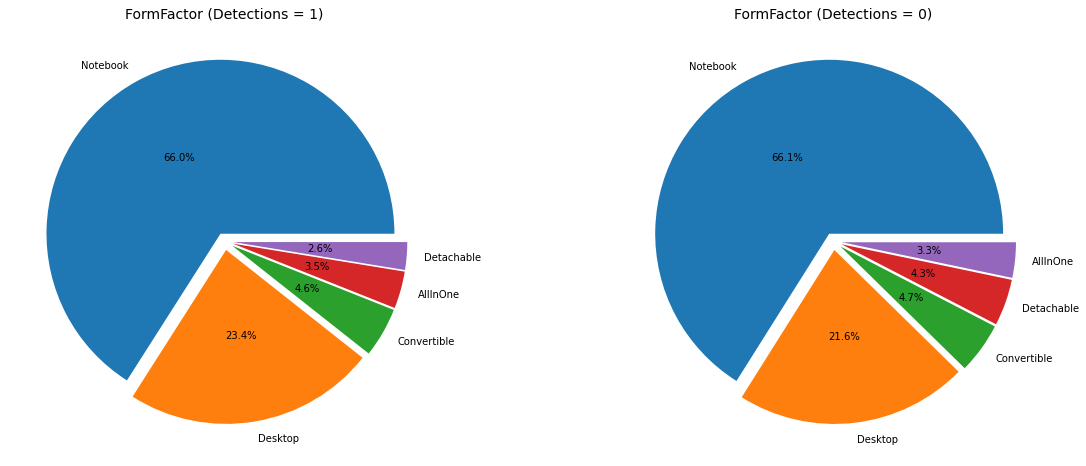

In [ ]:
pie, ax = plt.subplots(1,2, figsize=(20,8))
ax[1].pie(x=q5b_data0, autopct="%.1f%%", explode=[0.05]*q5b_data0.shape[0], labels=q5b_data0.keys(), pctdistance=0.5)
ax[1].set_title("FormFactor (Detections = 0)", fontsize=14)
ax[0].pie(x=q5b_data1, autopct="%.1f%%", explode=[0.05]*q5b_data1.shape[0], labels=q5b_data1.keys(), pctdistance=0.5)
ax[0].set_title("FormFactor (Detections = 1)", fontsize=14)

####<font color='cyan'>Plot 3 
Game updates sometimes open up the gate for malware. I wanted to see if this was true in the case of the dataset.
<br>
I plotted the counts for Detections and Non-detections for Gamer and Non-Gamer using `Wdft_IsGamer` column from the data. The plot shows Gamers have more percent detections than non gamers although slightly. This can be used as feature for the model.
</font>

In [ ]:
q5c = pd.read_csv('train.csv.zip', usecols=['Wdft_IsGamer', 'HasDetections'], dtype=dtypes)

In [ ]:
q5c = q5c.groupby(['Wdft_IsGamer', 'HasDetections']).size().reset_index().rename(columns={0:'TotalCount'})
q5c = q5c.pivot(index='Wdft_IsGamer',columns='HasDetections', values='TotalCount')

[]

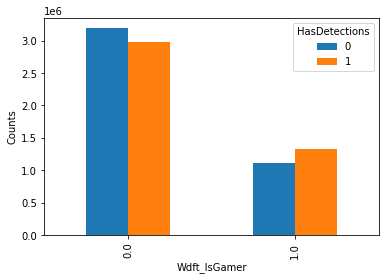

In [ ]:
q5c.plot(kind='bar',ylabel='Counts')

## **Section 5: Baseline modelling (Q6)**

####<font color='cyan'> Data & Cleaning
This section involves loading data (only the features) required for Model 0, 1, 2.
<br>
We then clean the data filling the missing values and tweaking some unnecessary fields in categorical feature (like `Census_PrimaryDiskTypeName`).
</font>

In [ ]:
Features = [
              'MachineIdentifier',
              'AppVersion',
              'AVProductsInstalled',
              'AVProductStatesIdentifier',
              'Census_OSInstallTypeName',
              'Wdft_IsGamer',
              'Census_MDC2FormFactor',
              'Census_OSVersion',
              'Census_TotalPhysicalRAM',
              'Census_PrimaryDiskTotalCapacity',
              'IsProtected',
              'Census_PrimaryDiskTypeName',
              'Census_OSWUAutoUpdateOptionsName',
              'Census_ProcessorCoreCount',
              'Census_IsSecureBootEnabled',
              'Census_SystemVolumeTotalCapacity',
              'OsVer',
            ]

Target = 'HasDetections'

In [ ]:
X = pd.read_csv('train.csv.zip', usecols=Features+[Target], dtype=dtypes)
Y = X.pop(Target)

In [ ]:
X['Census_PrimaryDiskTypeName'].replace(to_replace='Unspecified', value='UNKNOWN', inplace=True)

In [ ]:
cleanerDict = {
    'AVProductsInstalled':0,
    'AVProductStatesIdentifier':X['AVProductStatesIdentifier'].median(),
    'AVProductsEnabled':0,
    'Wdft_IsGamer':0,
    'IsProtected':0,
    'Census_PrimaryDiskTypeName':'UNKNOWN',
    'Census_TotalPhysicalRAM':X['Census_TotalPhysicalRAM'].median(),
    'Census_PrimaryDiskTotalCapacity':X['Census_PrimaryDiskTotalCapacity'].median(),
    'Census_ProcessorCoreCount':X['Census_ProcessorCoreCount'].median(),
    'Census_SystemVolumeTotalCapacity':X['Census_SystemVolumeTotalCapacity'].median(),

}

In [ ]:
X.fillna(cleanerDict, inplace=True)

<font color='cyan'> The data from `train.csv.zip` is cleaned above and is divided into Training and Testing data below.
<br>
Training Size: `0.8`<br>
Testing Size: `0.2` 
</font>

In [ ]:
XTrain, XTest, YTrain, YTest = train_test_split( X, Y, train_size=0.8)

###<font color='cyan'>Model 0
My baseline model includes features that looked interesting and I thought would contribute to the `HasDetections` prediction.
My pipeline includes ColumnTransformer that only allows columns that are features to pass through; rest of the columns in the data are not included while training the model.
<br>
The classifier model used in this section is `LogisticRegression`.
<br>
Feature list: `AVProductsInstalled` `Wdft_IsGamer` `Census_TotalPhysicalRAM` `Census_PrimaryDiskTotalCapacity` `IsProtected` `Census_ProcessorCoreCount` `Census_SystemVolumeTotalCapacity`
<br>
The error rate : `0.48984` <br>
The AUC score : `0.53780`
<br>
The error rate here means what percent of the data have been wrongly labeled. The error rate of `0.48984` means the model is as good as coin toss for labeling the data.
</font>

In [ ]:
q6ColumnTransformer = ColumnTransformer([
                                         ('pass', 'passthrough',['AVProductsInstalled', 'Wdft_IsGamer', 'Census_TotalPhysicalRAM', 'Census_PrimaryDiskTotalCapacity',
                                                                 'IsProtected','Census_ProcessorCoreCount', 'Census_SystemVolumeTotalCapacity'])
])

In [ ]:
q6model = Pipeline(steps=[
                          ('selector', q6ColumnTransformer),
                          ('classifier', LogisticRegression())
],
verbose=True) 

In [ ]:
q6model.fit(XTrain, YTrain)

[Pipeline] .......... (step 1 of 2) Processing selector, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  35.5s


Pipeline(memory=None,
         steps=[('selector',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pass', 'passthrough',
                                                  ['AVProductsInstalled',
                                                   'Wdft_IsGamer',
                                                   'Census_TotalPhysicalRAM',
                                                   'Census_PrimaryDiskTotalCapacity',
                                                   'IsProtected',
                                                   'Census_ProcessorCoreCount',
                                                   'Census_SystemVolumeTotalCapacity'])],
                                   verbose=False)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=F

In [ ]:
q6YPred = q6model.predict(XTest)

In [ ]:
print('The error rate : %.5f' %(1-accuracy_score(YTest, q6YPred)))
print('The AUC score : %.5f' % roc_auc_score(YTest, q6model.predict_proba(XTest)[:,1]))

The error rate : 0.48984
The AUC score : 0.53780


## **Section 6: Feature Cleaning and Additional models (Q7a & 7b)**

### <font color='cyan'> Model 1
My model 1 includes features that looked interesting and I thought would contribute to the `HasDetections` prediction.
<br>
The features have been preprocessed.<br>
The string features have been vectorized using `TfidfVectorizer`.<br>
The categorical features have been vectorized using `OneHotEncoder`.<br>
After converting all features to numerical values, the features are normalized using `StandardScaler`.
<br>
The classifier model used in this section is `LogisticRegression`.
<br>
Feature list: `AppVersion` `Census_OSVersion` `Census_OSInstallTypeName` `Census_MDC2FormFactor` `Census_PrimaryDiskTypeName` `Census_OSWUAutoUpdateOptionsName` `AVProductsInstalled` `AVProductStatesIdentifier` `Wdft_IsGamer` `Census_TotalPhysicalRAM` `Census_PrimaryDiskTotalCapacity` `IsProtected` `Census_ProcessorCoreCount` `Census_IsSecureBootEnabled` `Census_SystemVolumeTotalCapacity`
<br>
The error rate : `0.40294` <br>
The AUC score : `0.63348`
</font>

In [ ]:
q7aColumnTransformer = ColumnTransformer([
                                         ('vectorize_AppVersion', TfidfVectorizer(ngram_range=(1,2)), 'AppVersion'),
                                         ('vectorizer_Census_OSVersion', TfidfVectorizer(ngram_range=(1,2)), 'Census_OSVersion'),
                                         ('encoder', OneHotEncoder(handle_unknown='ignore'),[
                                                                                             'Census_OSInstallTypeName', 
                                                                                             'Census_MDC2FormFactor', 
                                                                                             'Census_PrimaryDiskTypeName',
                                                                                             'Census_OSWUAutoUpdateOptionsName']),
                                         ('pass', 'passthrough',['AVProductsInstalled',
                                                                 'AVProductStatesIdentifier',
                                                                 'Wdft_IsGamer',
                                                                 'Census_TotalPhysicalRAM',
                                                                 'Census_PrimaryDiskTotalCapacity',
                                                                 'IsProtected',
                                                                 'Census_ProcessorCoreCount',
                                                                 'Census_IsSecureBootEnabled',
                                                                 'Census_SystemVolumeTotalCapacity'])

])

In [ ]:
q7a_model = Pipeline(
    steps=[
        ('transoformation', q7aColumnTransformer),
        ('normalization', StandardScaler(with_mean=False)),
        ('classifier', LogisticRegression(class_weight='balanced'))
    ],
    verbose=True
)

print(q7a_model.named_steps)

{'transoformation': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('vectorize_AppVersion',
                                 TfidfVectorizer(analyzer='word', binary=False,
                                                 decode_error='strict',
                                                 dtype=<class 'numpy.float64'>,
                                                 encoding='utf-8',
                                                 input='content',
                                                 lowercase=True, max_df=1.0,
                                                 max_features=None, min_df=1,
                                                 ngram_range=(1, 2), norm='l2',
                                                 preproces...
                                  'Census_MDC2FormFactor',
                                  'Census_PrimaryDiskTypeName',
                       

In [ ]:
q7a_model.fit(XTrain, YTrain)

[Pipeline] ... (step 1 of 3) Processing transoformation, total= 2.3min
[Pipeline] ..... (step 2 of 3) Processing normalization, total=   4.2s
[Pipeline] ........ (step 3 of 3) Processing classifier, total= 1.5min


Pipeline(memory=None,
         steps=[('transoformation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('vectorize_AppVersion',
                                                  TfidfVectorizer(analyzer='word',
                                                                  binary=False,
                                                                  decode_error='strict',
                                                                  dtype=<class 'numpy.float64'>,
                                                                  encoding='utf-8',
                                                                  input='content',
                                                                  lowercase=True,
                                                                  max_df=1.0,
        

In [ ]:
q7aYPred = q7a_model.predict(XTest)

In [ ]:
print('The error rate : %.5f' %(1-accuracy_score(YTest, q7aYPred)))
print('The AUC score : %.5f' % roc_auc_score(YTest, q7a_model.predict_proba(XTest)[:,1]))

The error rate : 0.40294
The AUC score : 0.63348


### <font color='cyan'> Model 2
My model 2 includes features after careful analysis of every different column of data. This included finding correlation matrix between `HasDetections` and other numerical features. It also included plotting several plots to understand categorical data include significant information of would contribute to confusion rather. You can go through my rough work at the end of this notebook to get a gist of some of my analysis.
<br>
The features have been preprocessed.<br>
The string features have been vectorized using `TfidfVectorizer`.<br>
The categorical features have been vectorized using `OneHotEncoder`.<br>
After converting all features to numerical values, the features are normalized using `StandardScaler`.
<br>
The classifier model used in this section is `LGBMClassifier`.
<br>
Feature list: `AppVersion` `Census_OSVersion` `Census_OSInstallTypeName` `Census_MDC2FormFactor` `Census_PrimaryDiskTypeName` `Census_OSWUAutoUpdateOptionsName` `OsVer` `AVProductsInstalled` `AVProductStatesIdentifier` `Wdft_IsGamer` `Census_TotalPhysicalRAM` `Census_PrimaryDiskTotalCapacity` `IsProtected` `Census_ProcessorCoreCount` `Census_IsSecureBootEnabled`
<br>
The error rate : `0.38460` <br>
The AUC score : `0.66017`
</font>

In [ ]:
q7bColumnTransformer = ColumnTransformer([
                                         ('vectorize_AppVersion', TfidfVectorizer(ngram_range=(1,4)), 'AppVersion'),
                                         ('vectorizer_Census_OSVersion', TfidfVectorizer(ngram_range=(1,4)), 'Census_OSVersion'),
                                         ('encoder', OneHotEncoder(handle_unknown='ignore'),[
                                                                                             'Census_OSInstallTypeName', 
                                                                                             'Census_MDC2FormFactor', 
                                                                                             'Census_PrimaryDiskTypeName',
                                                                                             'Census_OSWUAutoUpdateOptionsName',
                                                                                             'OsVer',
                                                                                             ]),
                                         ('pass', 'passthrough',[
                                                                 'AVProductsInstalled',
                                                                 'AVProductStatesIdentifier',
                                                                 'Wdft_IsGamer',
                                                                 'Census_TotalPhysicalRAM',
                                                                 'IsProtected',
                                                                 'Census_ProcessorCoreCount',
                                                                 'Census_IsSecureBootEnabled',
                                                                 ])

])

q7b_model = Pipeline(
    steps=[
        ('transoformation', q7bColumnTransformer),
        ('normalization', StandardScaler(with_mean=False)),
        ('classifier', LGBMClassifier(class_weight='balanced', random_state=77))
    ],
    verbose=True
)

print(q7b_model.named_steps)

{'transoformation': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('vectorize_AppVersion',
                                 TfidfVectorizer(analyzer='word', binary=False,
                                                 decode_error='strict',
                                                 dtype=<class 'numpy.float64'>,
                                                 encoding='utf-8',
                                                 input='content',
                                                 lowercase=True, max_df=1.0,
                                                 max_features=None, min_df=1,
                                                 ngram_range=(1, 4), norm='l2',
                                                 preproces...
                                               handle_unknown='ignore',
                                               sparse=True),
             

In [ ]:
q7b_model.fit(XTrain, YTrain)

[Pipeline] ... (step 1 of 3) Processing transoformation, total= 2.4min
[Pipeline] ..... (step 2 of 3) Processing normalization, total=   4.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total= 2.3min


Pipeline(memory=None,
         steps=[('transoformation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('vectorize_AppVersion',
                                                  TfidfVectorizer(analyzer='word',
                                                                  binary=False,
                                                                  decode_error='strict',
                                                                  dtype=<class 'numpy.float64'>,
                                                                  encoding='utf-8',
                                                                  input='content',
                                                                  lowercase=True,
                                                                  max_df=1.0,
        

In [ ]:
q7bYPred = q7b_model.predict(XTest)

In [ ]:
print('The error rate : %.5f' %(1-accuracy_score(YTest, q7bYPred)))
print('The AUC score : %.5f' % roc_auc_score(YTest, q7b_model.predict_proba(XTest)[:,1]))

The error rate : 0.38460
The AUC score : 0.66017


####<font color='cyan'> Table for Comparison of Models
</font>

In [ ]:
pd.DataFrame([[0.48984, 0.53780], [0.40294, 0.63348], [0.38460, 0.66017]], index=['Model 0', 'Model 1', 'Model 2'], columns=['ErrorRate', 'AUC_Score'])

,ErrorRate,AUC_Score
Model 0,0.48984,0.53780
Model 1,0.40294,0.63348
Model 2,0.38460,0.66017


<font color='cyan'> The performance stands as Model0 < Model 1 < Model 2.
<br>
The Model 1 is an improvement over Model 0 because it use categorical features along with numerical features aswell. Model 1 implements StandardScaler that brigns all the values of all the features in the same range which makes it easier for the LogisticRegression to assign weights to the features.
<br>
Model 2 is slightly better than Model 1 as the features are selected after some careful analysis. The LGBMClassifier is an ensemble model that is a combination of multiple weak models working together which makes it an upgrade over LogisticRegression.

## **Section 7: Screenshots (Q8)** 

<font color='cyan'> Below is the section of loading the `test.csv.zip` and cleaning, preprocessing them. I apply model to the Test data as shown below for all models (0, 1, 2). Write the data in .csv file.

In [ ]:
testX = pd.read_csv('test.csv.zip', usecols=Features, dtype=dtypes)

In [ ]:
testX['Census_PrimaryDiskTypeName'].replace(to_replace='Unspecified', value='UNKNOWN', inplace=True)

In [ ]:
testX.fillna(cleanerDict, inplace=True)

In [ ]:
testYPred = q6model.predict_proba(testX)

In [ ]:
testYPredWrite = pd.DataFrame(testYPred, index=testX['MachineIdentifier']).reset_index().drop(columns=0).rename(columns={1:'HasDetections'})

In [ ]:
testYPredWrite.to_csv('submission_model0.csv', chunksize=50000, index=False)

Public Score: `0.62872`

Private Score: `0.57746`

Kaggle profile link: https://www.kaggle.com/karangada

Screenshot(s):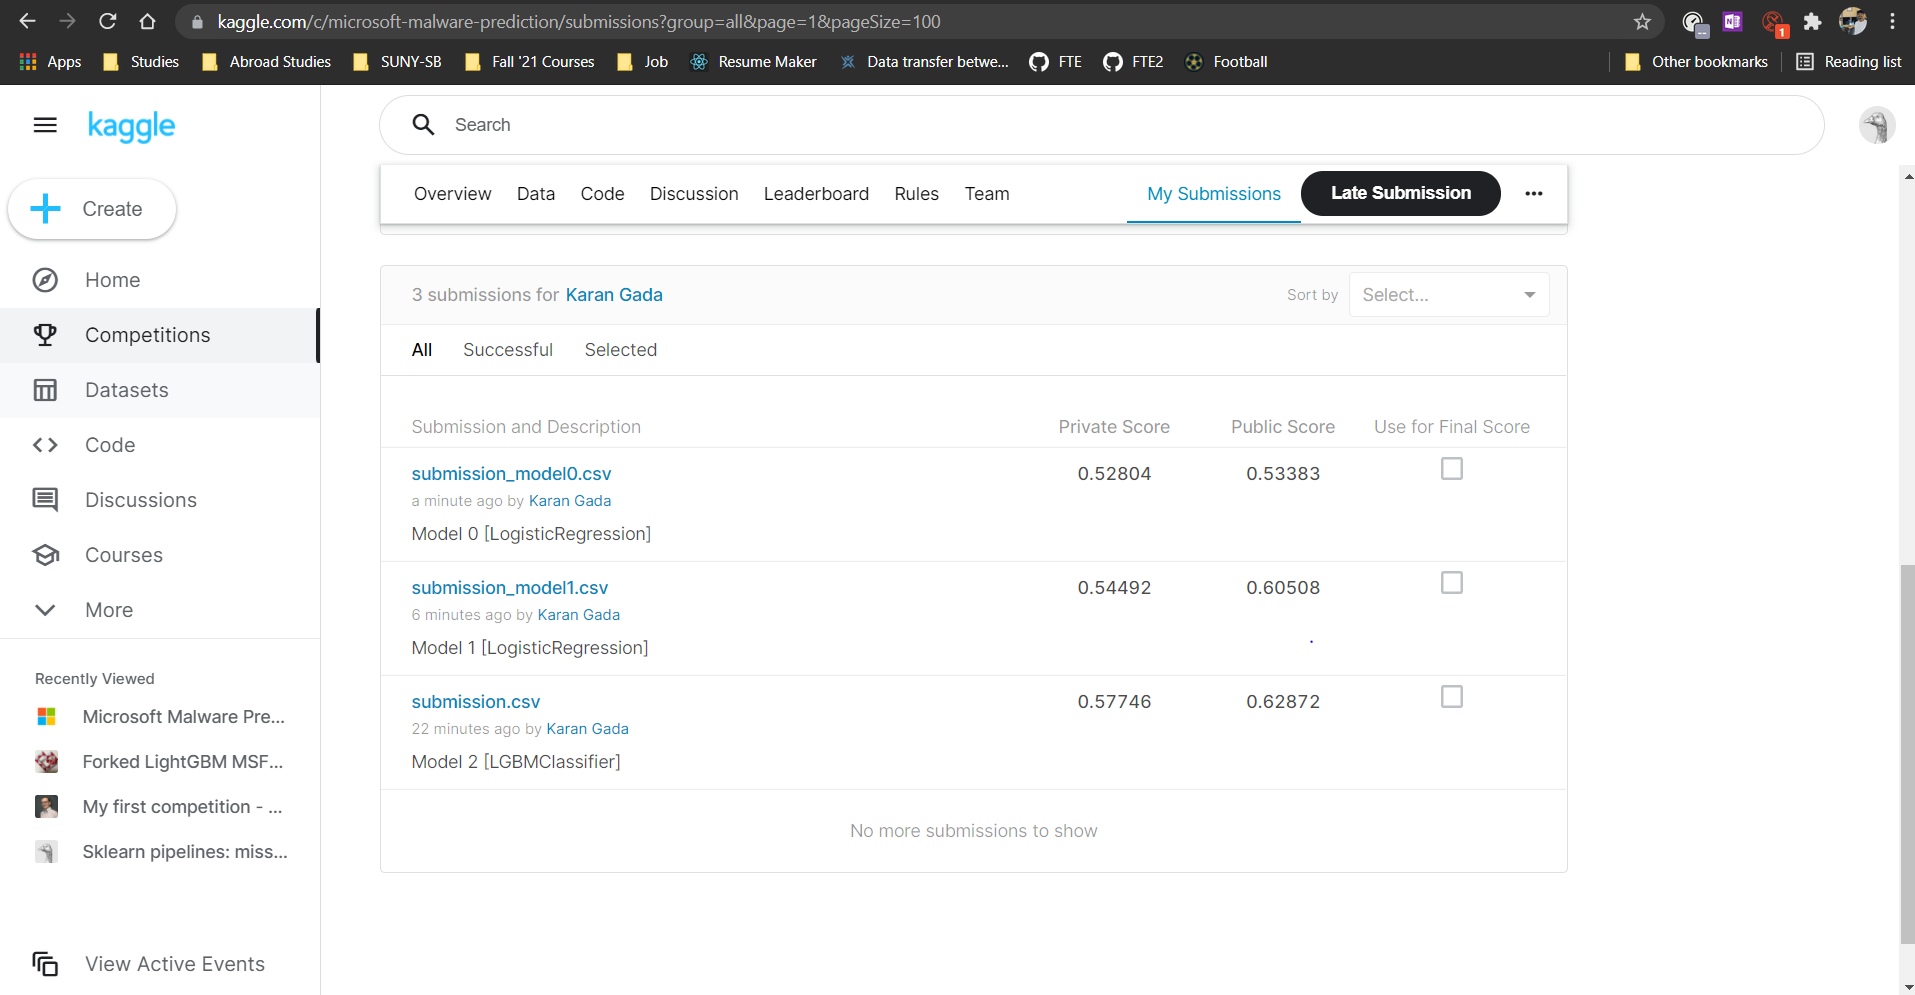

#<font color=red> THIS IS MY ROUGH WORK </font>

In [ ]:
trainData.corr()

####<font color='yellow'> For Question 2 </font>

In [ ]:
q2Data = trainData[['Census_ProcessorCoreCount', 'Census_TotalPhysicalRAM', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'HasDetections']]

In [ ]:
q2Data.fillna(q2Data.median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
scaler_ = preprocessing.MinMaxScaler()
q2DataScaled = scaler_.fit_transform(q2Data)
q2DataScaled = pd.DataFrame(q2DataScaled, columns=q2Data.columns)

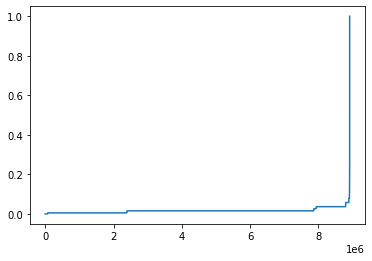

In [ ]:
q2DataScaled['Census_ProcessorCoreCount'].sort_values(ignore_index=True).plot()

In [ ]:
machinePower = 0.5*q2DataScaled['Census_TotalPhysicalRAM'] + 0.3*q2DataScaled['Census_ProcessorCoreCount'] + 0.2*q2DataScaled['Census_PrimaryDiskTotalCapacity']
machinePower = machinePower.reindex_like(q2DataScaled)

In [ ]:
print(machinePower.quantile(0.2))
print(machinePower.quantile(0.4))
print(machinePower.quantile(0.6))
print(machinePower.quantile(0.8))

0.0027919112947351723
0.005933272862858274
0.00593328455166926
0.007235579101201494


In [ ]:
machinePower.describe()

count    8.921483e+06
mean     6.553441e-03
std      4.425577e-03
min      1.254835e-09
25%      3.443062e-03
50%      5.933273e-03
75%      7.235567e-03
max      6.743456e-01
dtype: float64

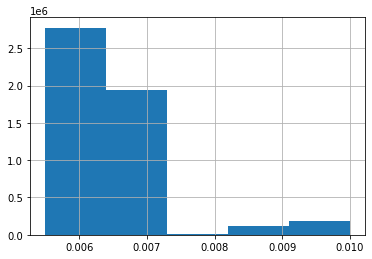

In [ ]:
machinePower.hist(bins=5, range=(0.0055, 0.01))

In [ ]:
print(q2Data[(machinePower < 0.001)].shape)
print(q2Data[(machinePower >= 0.001) & (machinePower < 0.0055)].shape)
print(q2Data[(machinePower >= 0.0055) & (machinePower < 0.02)].shape)
print(q2Data[(machinePower >= 0.02) & (machinePower < 0.03)].shape)
print(q2Data[(machinePower >= 0.03)].shape)

(47145, 5)
(2806223, 5)
(5936104, 5)
(114539, 5)
(17472, 5)


In [ ]:
q2Data[(machinePower < 0.001)].describe()

,Census_ProcessorCoreCount,Census_TotalPhysicalRAM,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,HasDetections
count,47145.0,47145.000000,4.714500e+04,4.714500e+04,47145.000000
mean,1.0,2088.708008,2.016667e+05,1.520223e+05,0.305377
std,0.0,585.675659,3.681147e+05,1.756443e+05,0.460572
min,1.0,255.000000,8.191000e+03,7.640000e+03,0.000000
25%,1.0,2048.000000,7.631900e+04,6.088900e+04,0.000000
50%,1.0,2048.000000,1.526270e+05,1.135110e+05,0.000000
75%,1.0,2048.000000,2.384750e+05,2.242760e+05,1.000000
max,1.0,3400.000000,6.710886e+07,8.387992e+06,1.000000


In [ ]:
q2Data[(machinePower >= 0.001) & (machinePower < 0.0055)]['Census_ProcessorCoreCount'].astype('float64').mean()

2.3260083036879107

In [ ]:
q2Data[(machinePower >= 0.0055) & (machinePower < 0.02)].head(5)

,Census_ProcessorCoreCount,Census_TotalPhysicalRAM,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,HasDetections
0,4.0,4096.0,476940.0,299451.0,0
1,4.0,4096.0,476940.0,102385.0,0
2,4.0,4096.0,114473.0,113907.0,0
3,4.0,4096.0,238475.0,227116.0,1
4,4.0,6144.0,476940.0,101900.0,1


In [ ]:
q2Data[(machinePower >= 0.02) & (machinePower < 0.03)].query('Census_ProcessorCoreCount == 1')


,Census_ProcessorCoreCount,Census_TotalPhysicalRAM,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,HasDetections
1633437,1.0,65536.0,358400.0,357833.0,0
3065203,1.0,65536.0,244198.0,243631.0,1
3681693,1.0,74350.0,230000.0,229029.0,0
5126998,1.0,65536.0,976762.0,975485.0,0
5393152,1.0,90119.0,51200.0,50649.0,0


In [ ]:
q2Data[(machinePower >= 0.03)].head(5)

,Census_ProcessorCoreCount,Census_TotalPhysicalRAM,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,HasDetections
1099,12.0,65536.0,114473.0,113917.0,1
1588,16.0,32768.0,906134.0,454787.0,1
2707,20.0,16384.0,244198.0,99385.0,1
3592,20.0,32768.0,238475.0,237087.0,0
3768,20.0,4096.0,113920.0,113352.0,0


In [ ]:
def transform_func(df_):
  if df_ < 0.001 : return "VERY LOW"
  elif df_ >= 0.001 and df_ < 0.0055: return "LOW"
  elif df_ >= 0.0055 and df_ < 0.02: return "MEDIUM"
  elif df_ >= 0.02 and df_ < 0.03: return "HIGH"
  elif df_ >= 0.03: return "VERY HIGH"

In [ ]:
q2Data['machinePowerLabel'] = machinePower.apply(transform_func)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


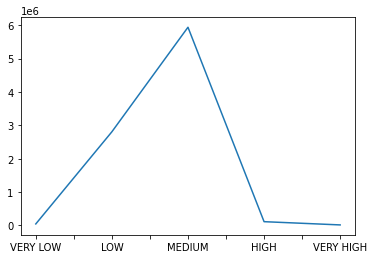

In [ ]:
q2Data['machinePowerLabel'].value_counts().reindex(['VERY LOW',"LOW","MEDIUM", "HIGH", "VERY HIGH"]).plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0328f570d0>,
      dtype=object)

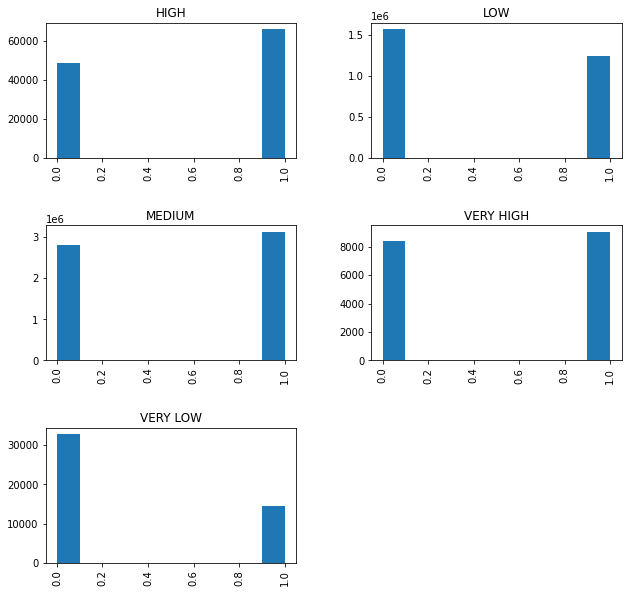

In [ ]:
q2Data.hist(column='HasDetections', by='machinePowerLabel', figsize=(10,10))
# q2DataPlot = q2Data.groupby('machinePowerLabel')['HasDetections'].value_counts()
# q2DataPlot.name = "TotalCount"
# q2DataPlot = q2DataPlot.reset_index('HasDetections').pivot(columns='HasDetections', values='TotalCount').fillna(0)
# q2DataPlot.plot.bar(stacked=True)

####<font color='yellow'> For Question Q3 </font>

In [ ]:
q3Data = trainData.groupby('Census_OSBuildNumber')['HasDetections'].value_counts()
q3Data.name = "TotalCount"
q3Data = q3Data.reset_index('HasDetections').pivot(columns='HasDetections', values='TotalCount').fillna(0)

In [ ]:
q3Data['PercentageDetection'] = q3Data[1]/(q3Data[0]+q3Data[1])
q3Data

HasDetections,0,1,PercentageDetection
Census_OSBuildNumber,,,
7600,1.0,0.0,0.000000
7601,3.0,4.0,0.571429
9200,3.0,3.0,0.500000
9600,9.0,3.0,0.250000
10240,139501.0,132103.0,0.486381
...,...,...,...
18238,1.0,0.0,0.000000
18240,5.0,0.0,0.000000
18241,1.0,0.0,0.000000


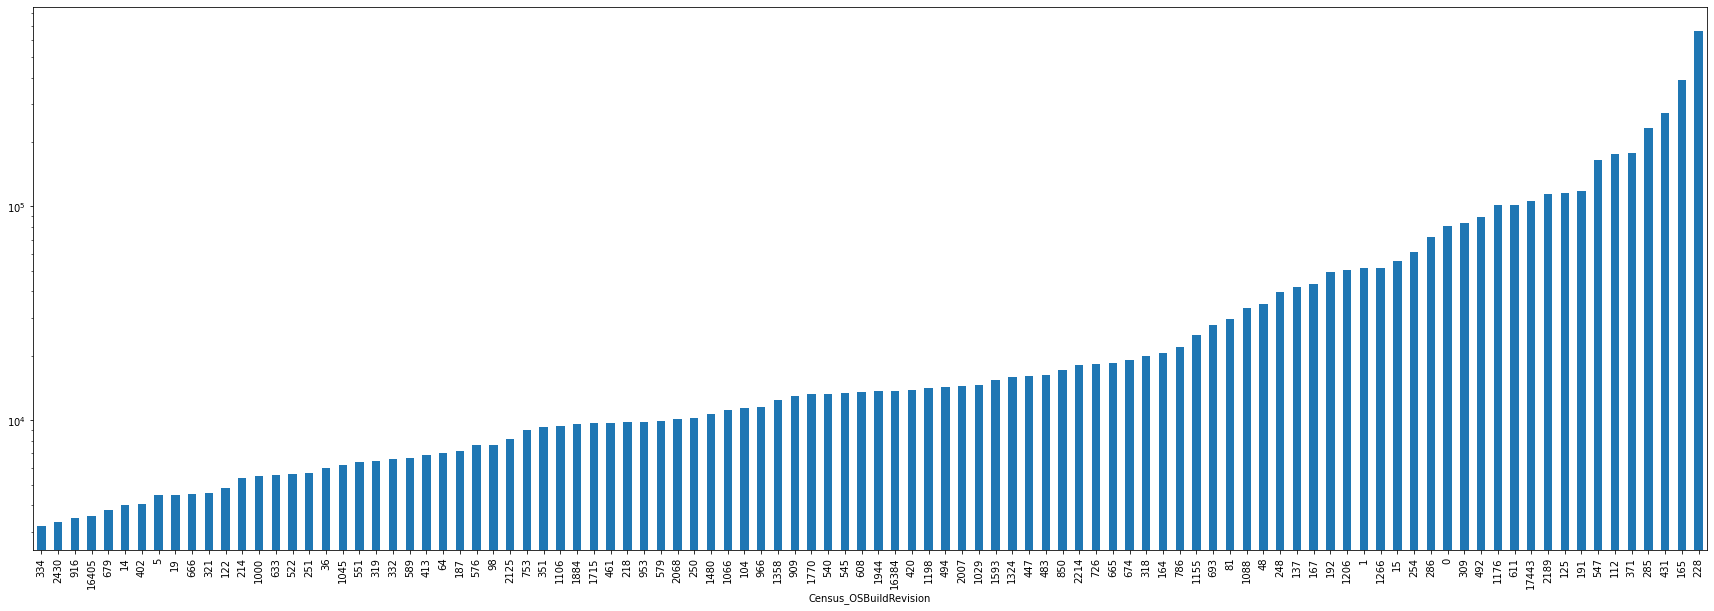

In [75]:
q3Data[0].sort_values()[-100:].plot(kind='bar', figsize=(30,10), logy=True)

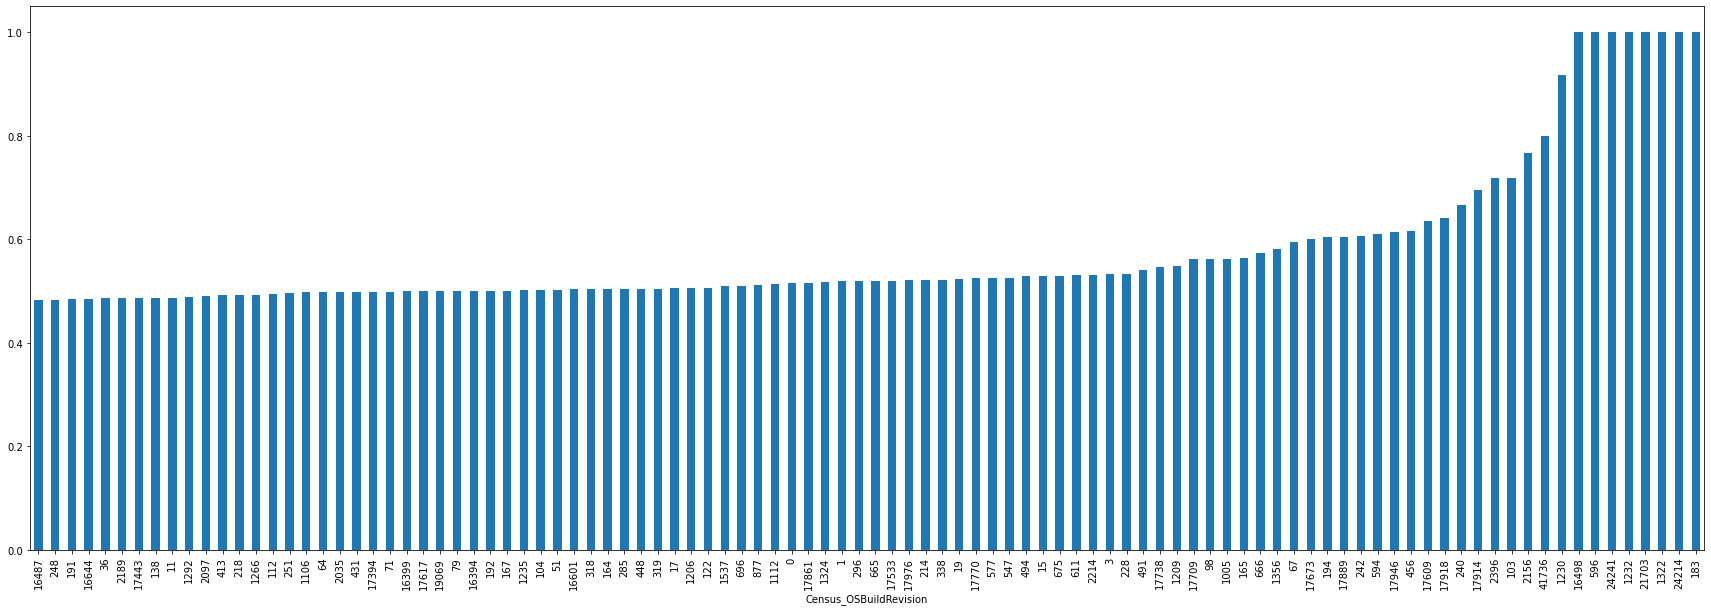

In [74]:
q3Data['PercentageDetection'].sort_values()[-100:].plot(kind='bar', figsize=(30,10))

In [ ]:
q3Data = trainData.groupby('Census_OSBuildRevision')['HasDetections'].value_counts()
q3Data.name = "TotalCount"
q3Data = q3Data.reset_index('HasDetections').pivot(columns='HasDetections', values='TotalCount').fillna(0)

In [ ]:
q3Data['PercentageDetection'] = q3Data[1]/(q3Data[0]+q3Data[1])
q3Data

HasDetections,0,1,PercentageDetection
Census_OSBuildRevision,,,
0,80719.0,85650.0,0.514819
1,51280.0,55303.0,0.518873
3,3153.0,3588.0,0.532265
4,283.0,239.0,0.457854
5,4455.0,3125.0,0.412269
...,...,...,...
23418,1.0,0.0,0.000000
24149,1.0,0.0,0.000000
24214,0.0,1.0,1.000000


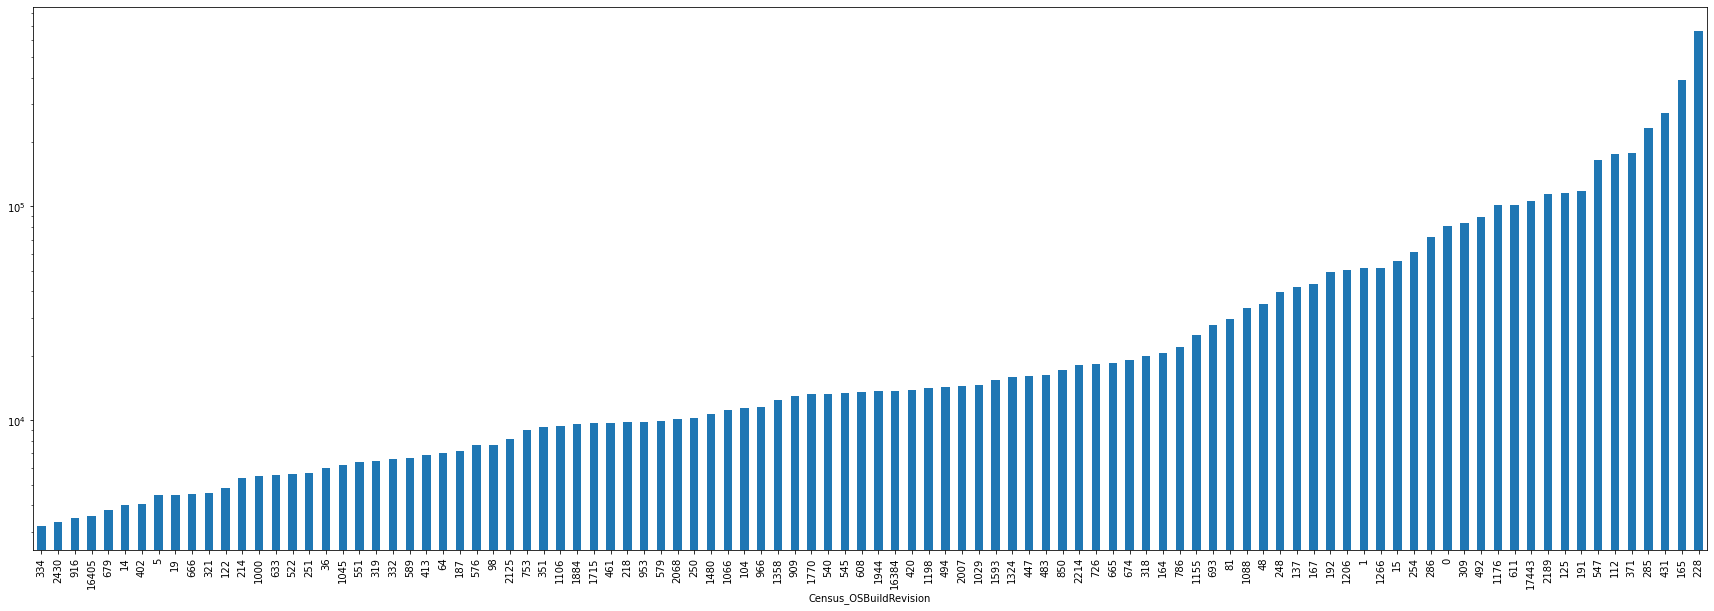

In [ ]:
q3Data[0].sort_values()[-100:].plot(kind='bar', figsize=(30,10), logy=True)

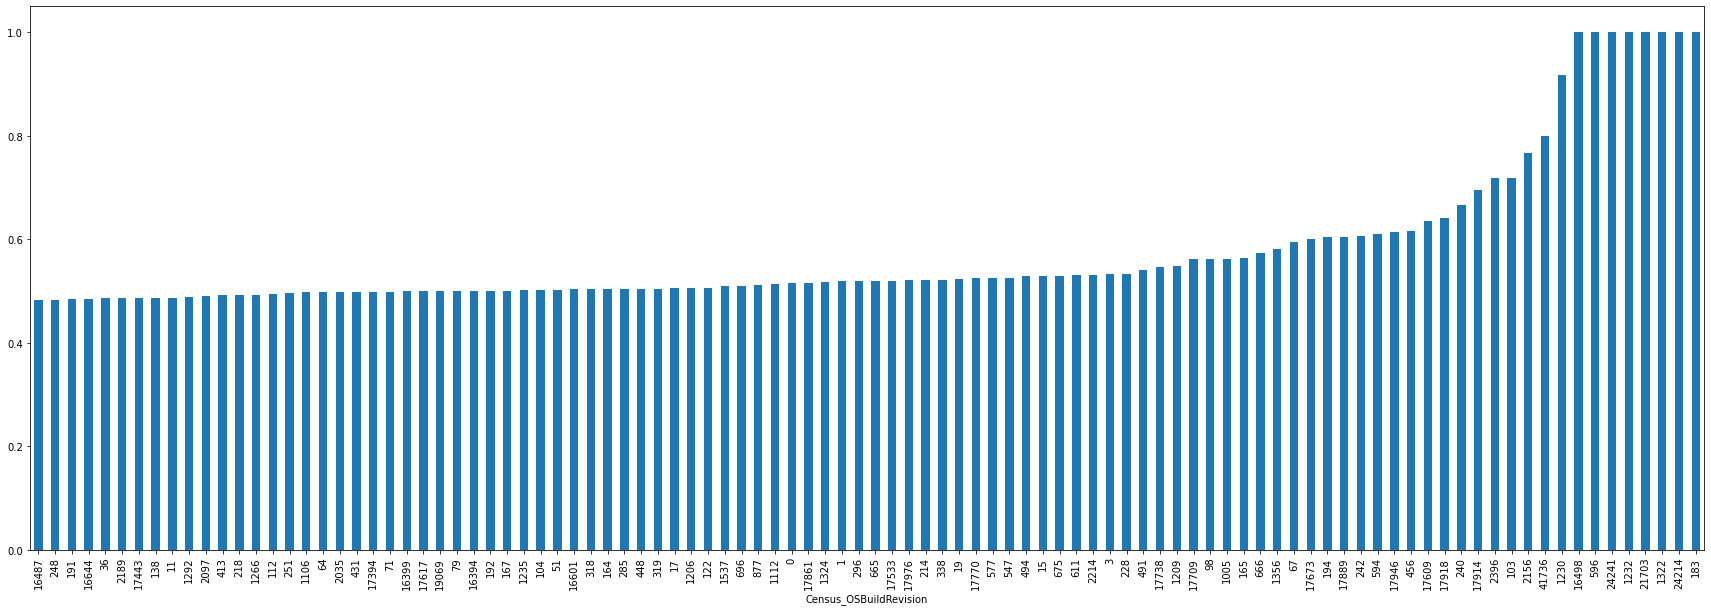

In [ ]:
q3Data['PercentageDetection'].sort_values()[-100:].plot(kind='bar', figsize=(30,10))

####<font color='yellow'> For Question 4 </font>

In [ ]:
q4Data = trainData[['AVProductsInstalled','HasDetections']]
q4Data = q4Data.fillna(0)
q4Data = q4Data.groupby('AVProductsInstalled')['HasDetections'].value_counts()
q4Data.name = "TotalCount"
q4Data = q4Data.reset_index('HasDetections').pivot(columns='HasDetections', values='TotalCount').fillna(0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c16966350>,
      dtype=object)

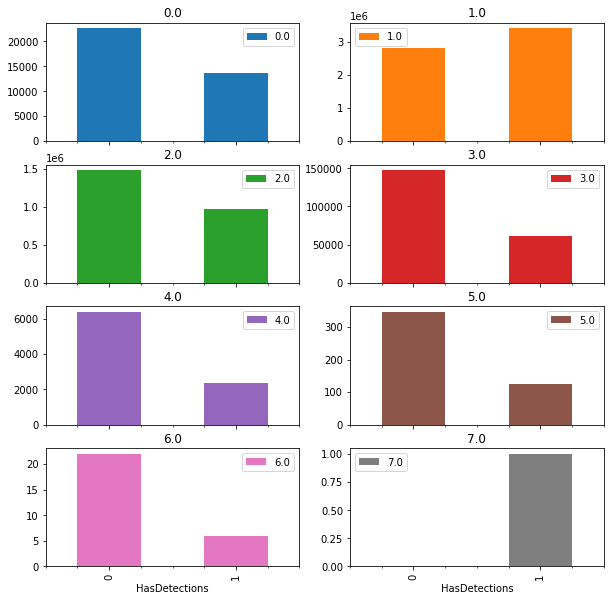

In [ ]:
q4Data.T.plot(kind='bar', subplots=True, figsize=(10,10), layout=(-1, 2))
# q4Data.hist(column='HasDetections', by='AVProductsInstalled', layout=(-1,5), figsize=(20,10), bins=2, stacked=True)
# q4Data.plot(kind='bar')
# for i in range(q4Data.shape[0]):
#   print(q4Data.iloc[i])
#   q4Data.iloc[i].plot(kind='bar', )

In [ ]:
q4Data.groupby('AVProductsInstalled')['HasDetections'].value_counts()

AVProductsInstalled  HasDetections
0.0                  0                      1
1.0                  1                3419711
                     0                2825403
2.0                  0                1483012
                     1                 975996
3.0                  0                 147421
                     1                  60682
4.0                  0                   6386
                     1                   2371
5.0                  0                    346
                     1                    125
6.0                  0                     22
                     1                      6
7.0                  1                      1
Name: HasDetections, dtype: int64

####<font color='yellow'> For Question 5 </font>

##### <font color='yellow'>For Question a </font>

<font color='cyan'>The `AVProductsInstalled` showed how many Anti-virus products version installed. However, are all the proucts enabled in all cases? <br>
To show this I plotted a heatmap for `AVProductsInstalled` vs `AVProductsEnabled`. I normalized the count of each mapping to bring all values in same range (0,1) to compare.
<br>
The heatmap suggested that machine didn't enable the actual number of installed AVProducts. In fact, they mostly used `1` AVProduct despite the number of installed. 
</font>

In [ ]:
q5a = pd.read_csv('train.csv.zip', usecols=['AVProductsInstalled', 'AVProductsEnabled'], dtype=dtypes)
q5a = q5a.fillna(0)

In [ ]:
q5a = q5a.groupby(['AVProductsInstalled','AVProductsEnabled']).size().reset_index().rename(columns={0:'Counts'})
q5a = q5a.pivot(index='AVProductsInstalled',columns='AVProductsEnabled',values='Counts')

In [ ]:
q5a_normalized = preprocessing.normalize(q5a.fillna(0))
q5a_normalized = pd.DataFrame(q5a_normalized, index=q5a.index, columns=q5a.columns)
q5a_normalized

AVProductsEnabled,0.0,1.0,2.0,3.0,4.0,5.0
AVProductsInstalled,,,,,,
0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.0,0.002407,0.999997,0.000000,0.000000,0.000000,0.000000
2.0,0.004148,0.998250,0.058987,0.000000,0.000000,0.000000
3.0,0.008973,0.924524,0.379913,0.028996,0.000000,0.000000
4.0,0.008139,0.764843,0.575909,0.280591,0.067435,0.000000
5.0,0.022295,0.468204,0.539550,0.530632,0.445909,0.093641
6.0,0.000000,0.341793,0.273434,0.820303,0.341793,0.136717
7.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


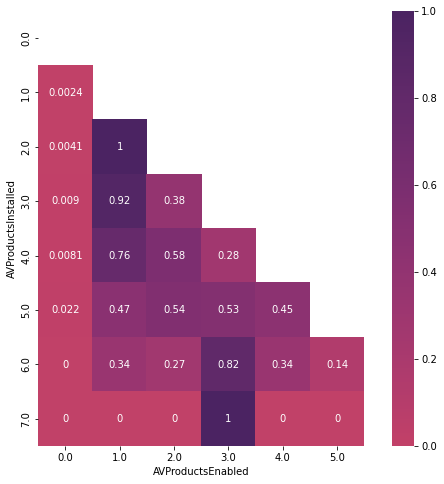

In [ ]:
mask = np.triu(np.ones_like(q5a_normalized, dtype=bool))
cmap = sns.color_palette('flare', as_cmap=True)
plt.subplots(figsize=(10,8))
sns.heatmap(q5a_normalized, mask=mask, cmap=cmap, center=0,
            square=True, annot=True)


##### <font color='yellow'>For Question b </font>

<font color='cyan'> `Census_MDC2FormFactor` is an interesting feature to observe while detecting malware. While looking at the data of detected malware machine it looks like most of the machine had a particular type `Notebook` as their categorical feature `Census_MDC2FormFactor`. Hence it seems a great feature.
<br>
This is only true till you plot some graphs for that column.
<br>
Once plotted pie chart for this categorical feature for `HasDetected=1` and `HasDetected=0` we understand that this feature is not as useful.
<br>
There are almost same percent of data samples for each category in detected vs not-detected data.

In [ ]:
q5b = pd.read_csv('train.csv.zip', usecols=['Census_MDC2FormFactor', 'HasDetections'], dtype=dtypes)

In [ ]:
q5b_data1 = q5b[q5b['HasDetections'] == 1].copy()
q5b_data1 = q5b_data1.groupby('Census_MDC2FormFactor').size()
q5b_data1 = q5b_data1.sort_values(ascending=False)[:5]
# q5b_data1

Census_MDC2FormFactor
Notebook       2876153
Desktop        1019851
Convertible     201394
AllInOne        150581
Detachable      111996
dtype: int64

In [ ]:
q5b_data0 = q5b[q5b['HasDetections'] == 0].copy()
q5b_data0 = q5b_data0.groupby('Census_MDC2FormFactor').size()
q5b_data0 = q5b_data0.sort_values(ascending=False)[:5]
# q5b_data0

Census_MDC2FormFactor
Notebook       2847166
Desktop         931235
Convertible     203984
Detachable      186237
AllInOne        141496
dtype: int64

Text(0.5, 1.0, 'FormFactor (Detections = 1)')

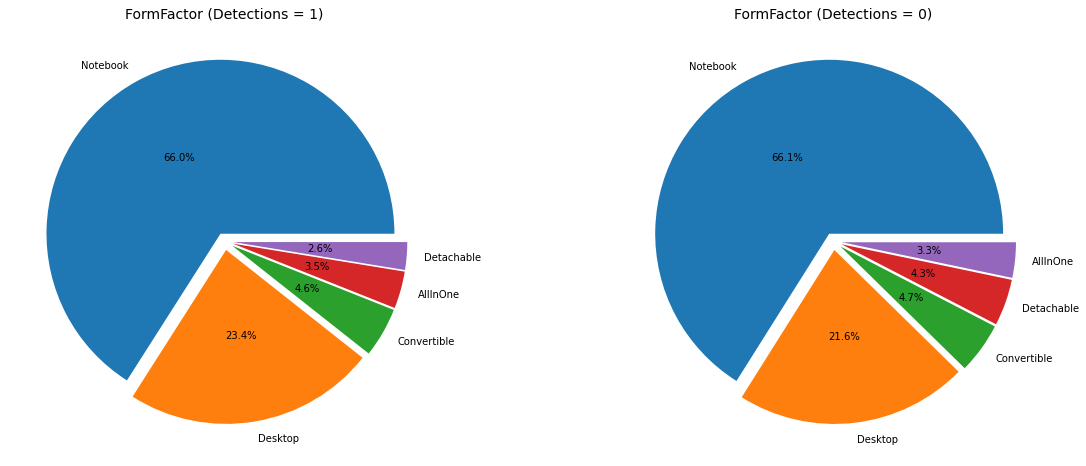

In [ ]:
pie, ax = plt.subplots(1,2, figsize=(20,8))
ax[1].pie(x=q5b_data0, autopct="%.1f%%", explode=[0.05]*q5b_data0.shape[0], labels=q5b_data0.keys(), pctdistance=0.5)
ax[1].set_title("FormFactor (Detections = 0)", fontsize=14)
ax[0].pie(x=q5b_data1, autopct="%.1f%%", explode=[0.05]*q5b_data1.shape[0], labels=q5b_data1.keys(), pctdistance=0.5)
ax[0].set_title("FormFactor (Detections = 1)", fontsize=14)

##### <font color='yellow'>For Question c </font>

In [ ]:
q5c = pd.read_csv('train.csv.zip', usecols=['Wdft_IsGamer', 'HasDetections'], dtype=dtypes)

In [ ]:
q5c = q5c.groupby(['Wdft_IsGamer', 'HasDetections']).size().reset_index().rename(columns={0:'TotalCount'})
q5c = q5c.pivot(index='Wdft_IsGamer',columns='HasDetections', values='TotalCount')

[]

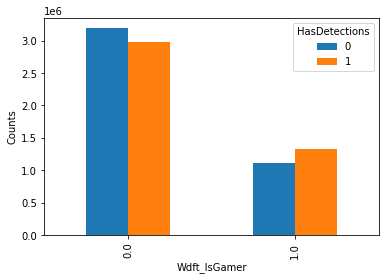

In [ ]:
q5c.plot(kind='bar',ylabel='Counts')

In [ ]:
q5c = pd.read_csv('train.csv.zip', usecols=['CountryIdentifier', 'CityIdentifier', 'HasDetections'], dtype=dtypes)

####<font color='yellow'> For Question 6 </font>

In [ ]:
Features = [
              'MachineIdentifier',
              'AppVersion',
              'AVProductsInstalled',
              'AVProductStatesIdentifier',
              'Census_OSInstallTypeName',
              'Wdft_IsGamer',
              'Census_MDC2FormFactor',
              'Census_OSVersion',
              'Census_TotalPhysicalRAM',
              'Census_PrimaryDiskTotalCapacity',
              'IsProtected',
              'Census_PrimaryDiskTypeName',
              'Census_OSWUAutoUpdateOptionsName',
              'Census_ProcessorCoreCount',
              'Census_IsSecureBootEnabled',
              'Census_SystemVolumeTotalCapacity',
              'OsVer',
            ]

Target = 'HasDetections'

In [ ]:
X = pd.read_csv('train.csv.zip', usecols=Features+[Target], dtype=dtypes)
Y = X.pop(Target)

In [ ]:
X['Census_PrimaryDiskTypeName'].replace(to_replace='Unspecified', value='UNKNOWN', inplace=True)

In [ ]:
cleanerDict = {
    'AVProductsInstalled':0,
    'AVProductStatesIdentifier':X['AVProductStatesIdentifier'].median(),
    'AVProductsEnabled':0,
    'Wdft_IsGamer':0,
    'IsProtected':0,
    'Census_PrimaryDiskTypeName':'UNKNOWN',
    'Census_TotalPhysicalRAM':X['Census_TotalPhysicalRAM'].median(),
    'Census_PrimaryDiskTotalCapacity':X['Census_PrimaryDiskTotalCapacity'].median(),
    'Census_ProcessorCoreCount':X['Census_ProcessorCoreCount'].median(),
    'Census_SystemVolumeTotalCapacity':X['Census_SystemVolumeTotalCapacity'].median(),

}

In [ ]:
X.fillna(cleanerDict, inplace=True)

In [ ]:
XTrain, XTest, YTrain, YTest = train_test_split( X, Y, train_size=0.8)
del X, Y

In [ ]:
q6ColumnTransformer = ColumnTransformer([
                                         ('pass', 'passthrough',['AVProductsInstalled', 'Wdft_IsGamer', 'Census_TotalPhysicalRAM', 'Census_PrimaryDiskTotalCapacity',
                                                                 'IsProtected','Census_ProcessorCoreCount', 'Census_SystemVolumeTotalCapacity'])
])

In [ ]:
q6model = Pipeline(steps=[
                          ('selector', q6ColumnTransformer),
                          ('classifier', LogisticRegression())
],
verbose=True) 

In [ ]:
q6model.fit(XTrain, YTrain)

[Pipeline] .......... (step 1 of 2) Processing selector, total=   0.6s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  35.5s


Pipeline(memory=None,
         steps=[('selector',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pass', 'passthrough',
                                                  ['AVProductsInstalled',
                                                   'Wdft_IsGamer',
                                                   'Census_TotalPhysicalRAM',
                                                   'Census_PrimaryDiskTotalCapacity',
                                                   'IsProtected',
                                                   'Census_ProcessorCoreCount',
                                                   'Census_SystemVolumeTotalCapacity'])],
                                   verbose=False)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=F

In [ ]:
q6YPred = q6model.predict(XTest)

In [ ]:
print('The error rate : %.5f' %(1-accuracy_score(YTest, q6YPred)))
print('The AUC score : %.5f' % roc_auc_score(YTest, q6model.predict_proba(XTest)[:,1]))

The error rate : 0.48984
The AUC score : 0.53780


####<font color='yellow'>For Question 7</font>

In [ ]:
print(XTrain['AppVersion'].unique().to_list())

['4.18.1807.18075', '4.11.15063.447', '4.18.1806.18062', '4.9.10586.1106', '4.11.15063.1155', '4.14.17639.18041', '4.8.10240.17443', '4.10.209.0', '4.16.17656.18052', '4.12.17007.18022', '4.11.15063.0', '4.12.16299.15', '4.13.17134.1', '4.9.10586.0', '4.13.17134.228', '4.18.1809.2', '4.12.17007.18011', '4.10.14393.1794', '4.10.14393.0', '4.8.10240.16384', '4.10.14393.953', '4.18.1806.20021', '4.12.17007.17123', '4.9.10586.839', '4.8.207.0', '4.14.17613.18039', '4.9.10586.672', '4.10.14393.1613', '4.9.10586.494', '4.13.17134.112', '4.10.14393.1198', '4.13.17134.191', '4.8.10240.17889', '4.8.10240.17861', '4.9.10586.589', '4.14.17613.18038', '4.9.10586.965', '4.9.10586.916', '4.10.14393.1593', '4.13.17134.319', '4.9.10586.1045', '4.10.14393.1066', '4.9.10586.873', '4.8.204.0', '4.8.10240.17354', '4.9.218.0', '4.8.10240.17914', '4.8.10240.17394', '4.8.10240.17609', '4.8.10240.17946', '4.10.14393.2273', '4.5.218.0', '4.10.14393.1532', '4.8.10240.17071', '4.8.10240.17918', '4.11.15063.994',

In [ ]:
q7aColumnTransformer = ColumnTransformer([
                                         ('vectorize_AppVersion', TfidfVectorizer(ngram_range=(1,2)), 'AppVersion'),
                                         ('vectorizer_Census_OSVersion', TfidfVectorizer(ngram_range=(1,2)), 'Census_OSVersion'),
                                         ('encoder', OneHotEncoder(handle_unknown='ignore'),[
                                                                                             'Census_OSInstallTypeName', 
                                                                                             'Census_MDC2FormFactor', 
                                                                                             'Census_PrimaryDiskTypeName',
                                                                                             'Census_OSWUAutoUpdateOptionsName']),
                                         ('pass', 'passthrough',['AVProductsInstalled',
                                                                 'AVProductStatesIdentifier',
                                                                 'Wdft_IsGamer',
                                                                 'Census_TotalPhysicalRAM',
                                                                 'Census_PrimaryDiskTotalCapacity',
                                                                 'IsProtected',
                                                                 'Census_ProcessorCoreCount',
                                                                 'Census_IsSecureBootEnabled',
                                                                 'Census_SystemVolumeTotalCapacity'])

])

In [ ]:
q7a_model = Pipeline(
    steps=[
        ('transoformation', q7aColumnTransformer),
        ('normalization', StandardScaler(with_mean=False)),
        ('classifier', LogisticRegression(class_weight='balanced'))
    ],
    verbose=True
)

print(q7a_model.named_steps)

{'transoformation': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('vectorize_AppVersion',
                                 TfidfVectorizer(analyzer='word', binary=False,
                                                 decode_error='strict',
                                                 dtype=<class 'numpy.float64'>,
                                                 encoding='utf-8',
                                                 input='content',
                                                 lowercase=True, max_df=1.0,
                                                 max_features=None, min_df=1,
                                                 ngram_range=(1, 2), norm='l2',
                                                 preproces...
                                  'Census_MDC2FormFactor',
                                  'Census_PrimaryDiskTypeName',
                       

In [ ]:
q7a_model.fit(XTrain, YTrain)

[Pipeline] ... (step 1 of 3) Processing transoformation, total= 2.3min
[Pipeline] ..... (step 2 of 3) Processing normalization, total=   4.2s
[Pipeline] ........ (step 3 of 3) Processing classifier, total= 1.5min


Pipeline(memory=None,
         steps=[('transoformation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('vectorize_AppVersion',
                                                  TfidfVectorizer(analyzer='word',
                                                                  binary=False,
                                                                  decode_error='strict',
                                                                  dtype=<class 'numpy.float64'>,
                                                                  encoding='utf-8',
                                                                  input='content',
                                                                  lowercase=True,
                                                                  max_df=1.0,
        

In [ ]:
q7aYPred = q7a_model.predict(XTest)

In [ ]:
print('The error rate : %.5f' %(1-accuracy_score(YTest, q7aYPred)))
print('The AUC score : %.5f' % roc_auc_score(YTest, q7aYPred))

The error rate : 0.40294
The AUC score : 0.59706


In [ ]:
q7bColumnTransformer = ColumnTransformer([
                                         ('vectorize_AppVersion', TfidfVectorizer(ngram_range=(1,4)), 'AppVersion'),
                                         ('vectorizer_Census_OSVersion', TfidfVectorizer(ngram_range=(1,4)), 'Census_OSVersion'),
                                         ('encoder', OneHotEncoder(handle_unknown='ignore'),[
                                                                                             'Census_OSInstallTypeName', 
                                                                                             'Census_MDC2FormFactor', 
                                                                                             'Census_PrimaryDiskTypeName',
                                                                                             'Census_OSWUAutoUpdateOptionsName',
                                                                                             'OsVer',
                                                                                             ]),
                                         ('pass', 'passthrough',[
                                                                 'AVProductsInstalled',
                                                                 'AVProductStatesIdentifier',
                                                                 'Wdft_IsGamer',
                                                                 'Census_TotalPhysicalRAM',
                                                                 'IsProtected',
                                                                 'Census_ProcessorCoreCount',
                                                                 'Census_IsSecureBootEnabled',
                                                                 ])

])

q7b_model = Pipeline(
    steps=[
        ('transoformation', q7bColumnTransformer),
        ('normalization', StandardScaler(with_mean=False)),
        ('classifier', LGBMClassifier(class_weight='balanced', random_state=77))
    ],
    verbose=True
)

print(q7b_model.named_steps)

{'transoformation': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('vectorize_AppVersion',
                                 TfidfVectorizer(analyzer='word', binary=False,
                                                 decode_error='strict',
                                                 dtype=<class 'numpy.float64'>,
                                                 encoding='utf-8',
                                                 input='content',
                                                 lowercase=True, max_df=1.0,
                                                 max_features=None, min_df=1,
                                                 ngram_range=(1, 4), norm='l2',
                                                 preproces...
                                               handle_unknown='ignore',
                                               sparse=True),
             

In [ ]:
q7b_model.fit(XTrain, YTrain)

[Pipeline] ... (step 1 of 3) Processing transoformation, total= 2.4min
[Pipeline] ..... (step 2 of 3) Processing normalization, total=   4.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total= 2.3min


Pipeline(memory=None,
         steps=[('transoformation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('vectorize_AppVersion',
                                                  TfidfVectorizer(analyzer='word',
                                                                  binary=False,
                                                                  decode_error='strict',
                                                                  dtype=<class 'numpy.float64'>,
                                                                  encoding='utf-8',
                                                                  input='content',
                                                                  lowercase=True,
                                                                  max_df=1.0,
        

In [ ]:
q7bYPred = q7b_model.predict(XTest)

In [ ]:
print('The error rate : %.5f' %(1-accuracy_score(YTest, q7bYPred)))
print('The AUC score : %.5f' % roc_auc_score(YTest, q7bYPred))

The error rate : 0.38460
The AUC score : 0.61541


In [ ]:
del X, Y

In [ ]:
testX = pd.read_csv('test.csv.zip', usecols=Features, dtype=dtypes)

In [ ]:
testX['Census_PrimaryDiskTypeName'].replace(to_replace='Unspecified', value='UNKNOWN', inplace=True)

In [ ]:
testX.fillna(cleanerDict, inplace=True)

In [ ]:
testYPred = q6model.predict_proba(testX)

In [ ]:
testYPredWrite = pd.DataFrame(testYPred, index=testX['MachineIdentifier']).reset_index().drop(columns=0).rename(columns={1:'HasDetections'})

In [ ]:
testYPredWrite.to_csv('submission_model0.csv', chunksize=50000, index=False)

In [ ]:
testYPredWrite.head()

,MachineIdentifier,HasDetections
0,0000010489e3af074adeac69c53e555e,0.544303
1,00000176ac758d54827acd545b6315a5,0.471601
2,0000019dcefc128c2d4387c1273dae1d,0.509401
3,0000055553dc51b1295785415f1a224d,0.501132
4,00000574cefffeca83ec8adf9285b2bf,0.493822


In [ ]:
!kaggle competitions submit -c microsoft-malware-prediction -f submission.csv -m "Message"
